# Setting

In [1]:
from pf_utils import PortfolioManager as PM 
from pf_utils import FinancialRatios, METRICS, FundDownloader
from pf_widgets import WidgetUniverse, WidgetTransaction, w_date

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
path_data = 'data'
path_tran = 'transaction'

In [3]:
file_cost='transaction_cost'
kw_cost = {'cost': file_cost}

## Portfolios
*Review portfolio settings*

In [4]:
PM.review('portfolio')

Portfolio: MMT_2407, PER_2410, WTR_2407, WTR_2412, LIQ, TDF_2406, HANA_2408, FCTR, KRX, TEST


In [5]:
PM.review_portfolio('WTR_2412')

{'strategy': 'WTR',
 'universe': 'UV_WTR',
 'file': 'pf_wtr2412_static',
 'path': 'transaction'}

In [6]:
#PM.review_strategy('WTR')
PM.review_portfolio('WTR_2412', strategy=True)

{'method_select': 'Selected', 'method_weigh': 'Equally'}

In [7]:
#PM.review_universe('UV_WTR')
PM.review_portfolio('WTR_2412', universe=True)

{'universe': 'etf',
 'file': 'etfs_weather',
 'tickers': 'ETF/KR',
 'to_daily': False,
 'path': 'data'}

In [8]:
c = PM.get_cost('UV_WTR', file_cost, path_tran)
c['buy']

Cost data transaction_cost_241217.csv loaded


ticker
069500    0.004209
273130    0.004209
379800    0.004209
411060    0.004209
148070    0.004209
284430    0.004209
Name: buy, dtype: float64

# Universe

In [9]:
PM.review('universes')

Universe: UV_K200, UV_KRX, UV_LIQ, UV_WTR, UV_ETF, UV_FUND, UV_FCTR


In [10]:
WidgetUniverse

## K200

In [11]:
k200 = PM.create_universe('UV_K200')

200 securities from 2022-01-03 to 2025-01-06 uploaded.
Price data loaded


In [12]:
#k200.portfolio_data
#k200.get_names()

In [13]:
kw = dict(
    n_years=3, 
    close_today = WidgetUniverse.values(1)
)
k200.download(**kw) if WidgetUniverse.values(0) else None

... done
200 securities from 2022-01-03 to 2025-01-16 downloaded.
kospi200_prices_250116.csv saved
df_prices updated
Execution time of download: 39.64 secs


## KRX

In [14]:
krx = PM.create_universe('UV_KRX')

2712 securities from 2019-01-02 to 2024-10-08 uploaded.
Price data loaded


In [15]:
#krx.get_names()

In [16]:
kw = dict(
    n_years=3, 
    close_today = WidgetUniverse.values(1),
    interval=5, pause_duration=1, msg=False
)
#krx.download(**kw) if WidgetUniverse.values(0) else None

## WTR

In [17]:
wtr = PM.create_universe('UV_WTR')

6 securities from 2022-01-03 to 2025-01-03 uploaded.
Price data loaded


In [18]:
wtr.get_names('selected')

0) 069500: KODEX 200
1) 379800: KODEX 미국S&P500TR
2) 273130: KODEX 종합채권(AA-이상)액티브
3) 411060: ACE KRX금현물
4) 148070: KOSEF 국고채10년
5) 284430: KODEX 200미국채혼합

In [19]:
#PM.review_universe('UV_WTR')

In [20]:
kw = dict(
    n_years=3, 
    close_today = WidgetUniverse.values(1),
    #tickers = ['069500', '273130', '148070', '379800', '411060', '284430']
    tickers = 'selected'
)
wtr.download(**kw) if WidgetUniverse.values(0) else None

... done
6 securities from 2022-01-03 to 2025-01-06 downloaded.
etfs_weather_250106.csv saved
df_prices updated
Execution time of download: 1.09 secs


In [21]:
#wtr.save()

## FCTR

In [73]:
fctr = PM.create_universe('UV_FCTR')

7 securities from 2021-01-04 to 2024-11-22 uploaded.
Price data loaded


In [74]:
fctr.get_names()

0) LRGF: iShares U.S. Equity Factor ETF
1) MTUM: iShares MSCI USA Momentum Factor ETF
2) QUAL: iShares MSCI USA Quality Factor ETF
3) SIZE: iShares MSCI USA Size Factor ETF
4) SPY: SPDR S&P 500 ETF Trust
5) USMV: iShares MSCI USA Min Vol Factor ETF
6) VLUE: iShares MSCI USA Value Factor ETF

In [75]:
kw = dict(
    n_years=3, 
    close_today = WidgetUniverse.values(1),
    tickers=['LRGF','MTUM','QUAL','SIZE','SPY','USMV','VLUE']
    #tickers='selected'
)
fctr.download(**kw) if WidgetUniverse.values(0) else None

[*********************100%***********************]  7 of 7 completed

... done
7 securities from 2021-01-04 to 2024-12-13 downloaded.
etfs_factors_241213.csv saved
df_prices updated
Execution time of download: 1.38 secs


## FUND

In [70]:
fund = PM.create_universe('UV_FUND')

64 securities from 2008-11-28 to 2024-11-29 uploaded.
REMINDER: 64 equities converted to daily (days in year: 365)
Daily metrics in Performance statistics must be meaningless
Price data loaded


In [71]:
kw = dict(
    n_years=20, 
    #close_today = WidgetUniverse.values(1),
    #tickers='selected',
    overwrite=True
)
fund.download(**kw) if WidgetUniverse.values(0) else None

64 tickers set


100%|███████████████████████████████████████████████████████████████| 64/64 [00:28<00:00,  2.28it/s]

28.1 secs elapsed, 0.5 secs paused (1.8%)
Max error of conversions: 6.69e-05
... done
64 securities from 2008-11-28 to 2024-12-31 downloaded.
funds_prices_241231.csv saved
REMINDER: 0 equities converted to daily (days in year: 365)
Daily metrics in Performance statistics must be meaningless
df_prices updated
Execution time of download: 28.26 secs


In [7]:
#fund.portfolio_data['universe']

### Case: Cost

In [8]:
universe = 'UV_FUND'
fund = PM.create_universe(universe)
cost = PM.get_cost(universe, file=file_cost, path=path_tran)
fee = cost['fee']

64 securities from 2008-11-28 to 2024-11-29 uploaded.
REMINDER: 64 equities converted to daily (days in year: 365)
Daily metrics in Performance statistics must be meaningless
Price data loaded
Cost data transaction_cost_241217.csv loaded


In [9]:
tickers = {k:v for k,v in fund.security_names.items() if 'TDF2045' in v}
tickers = list(tickers.keys())

In [12]:
tickers = ['K55301BU5479', 'K55234DF2988', 'K55223BT1757']
fund.get_names(tickers)

0) K55301BU5479: 미래에셋전략배분TDF2045혼합자산자투자신탁 종류C-P2e
1) K55234DF2988: IBK로우코스트TDF2045증권자투자신탁[혼합-재간접형]종류C-Re
2) K55223BT1757: KB온국민TDF2045증권투자신탁(주식혼합-재간접형)C-퇴직e

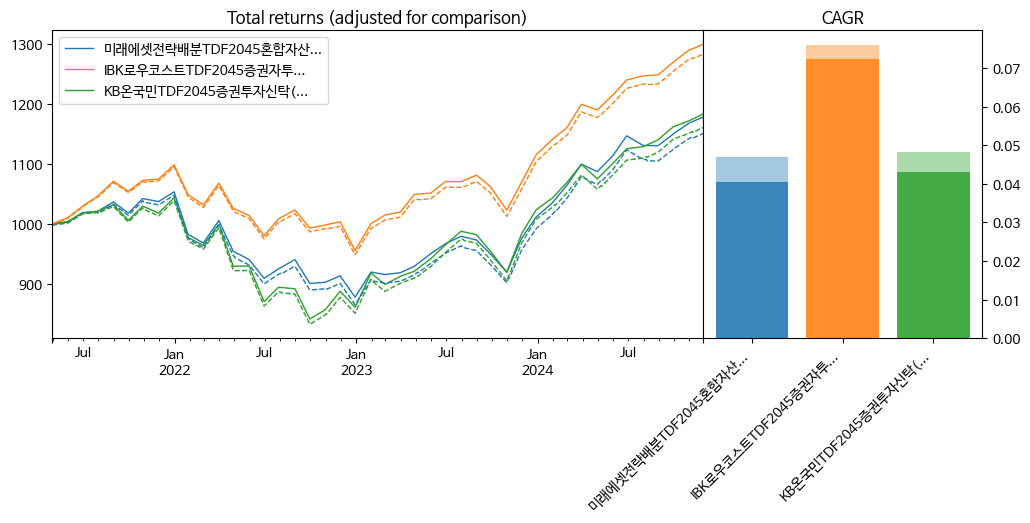

In [14]:
fund.plot(tickers, fee=fee, base=1000)

## LIQ

In [22]:
# portfolio of past trading system to liquidate soon
selected = [
    '011780', '066570', '035890', '040420', '140520', 
    '072990', '091580', '011200', '002220', '006650', 
    '136490', '064550', '460860', '040910', '024950',
    '900070', '036580', '184230', '460850', '016250',
    '001230', '049470', '217820', '109960'
]

In [23]:
liq = PM.create_universe('UV_LIQ')

24 securities from 2021-01-04 to 2024-12-18 uploaded.
Price data loaded


In [24]:
#liq.get_names()

In [25]:
kw = dict(
    n_years=3, 
    tickers= 'selected', #selected,
    close_today = WidgetUniverse.values(1),
    interval=5, pause_duration=1, msg=False
)
liq.download(**kw) if WidgetUniverse.values(0) else None

REMINDER: 24 tickers set regardless of market


100%|███████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 15.38it/s]

1.6 secs elapsed, 0.0 secs paused (0.0%)
... done
24 securities from 2022-01-03 to 2025-01-03 downloaded.
krx_liq_prices_250103.csv saved
df_prices updated
Execution time of download: 2.33 secs


## Additional Data

### Cost

*Check missing cost data*

In [19]:
PM.check_cost('UV_FUND', file_cost, path_tran)

Cost data transaction_cost_241217.csv loaded
64 securities from 2008-11-28 to 2024-11-29 uploaded.
REMINDER: 64 equities converted to daily (days in year: 365)
Daily metrics in Performance statistics must be meaningless
Price data loaded


*Update cost data for uiniverse UV_FUND, except for which of universes updated with manual editting*

In [20]:
fd = FundDownloader.create(fund)
#fd.export_cost('UV_FUND', 'transaction_cost', path=path_tran, update=True)
fd.export_cost('UV_FUND')

Data for 64 funds loaded.


,universe,ticker,buy,sell,fee,tax
0,UV_FUND,K55234DF2657,0.0,0.0,0.410,0.0
1,UV_FUND,K55234DF2459,0.0,0.0,0.410,0.0
2,UV_FUND,K55301BU6139,0.0,0.0,0.600,0.0
3,UV_FUND,K55105BU1161,0.0,0.0,0.420,0.0
4,UV_FUND,K55210BU2385,0.0,0.0,0.500,0.0
...,...,...,...,...,...,...
59,UV_FUND,K55105BT9936,0.0,0.0,0.540,0.0
60,UV_FUND,K55223BT1096,0.0,0.0,0.360,0.0
61,UV_FUND,K55301BU6113,0.0,0.0,0.570,0.0
62,UV_FUND,K55101BT4402,0.0,0.0,0.439,0.0


### Financial Ratio

In [26]:
WidgetUniverse

In [27]:
file = 'kospi200_ratios.csv'
fr = FinancialRatios(file, path_data)

Financial ratios of 200 stocks from 2023-01-02 to 2024-12-13 loaded


In [28]:
start = '2023-01-01'
universe = 'UV_K200'
freq = 'day'

if WidgetUniverse.values(0):
    tickers = PM.create_universe(universe).df_prices.columns.to_list()
    kw = dict(
        freq = freq,
        close_today = WidgetUniverse.values(1)
    )
    fr.download(tickers, start, **kw)

200 securities from 2022-01-03 to 2025-01-03 uploaded.
Price data loaded


100%|█████████████████████████████████████████████████████████████| 200/200 [12:00<00:00,  3.60s/it]


12.0 mins elapsed, 26.0 secs paused (3.6%)
Financial ratios of 200 stocks from 2023-01-02 to 2025-01-03 downloaded
kospi200_ratios_250103.csv saved


In [29]:
fratio = 'PER'
df_ratio = fr.util_reshape(fratio, stack=False)

In [30]:
df = PM.create_universe(universe).df_prices
fr.util_compare_periods(df)

200 securities from 2022-01-03 to 2025-01-03 uploaded.
Price data loaded
Ratio: 2023-01-02 ~ 2025-01-03
Price: 2022-01-03 ~ 2025-01-03


# Performance

In [11]:
PM.review()

Portfolio: MMT_2407, PER_2410, WTR_2407, WTR_2412, LIQ, TDF_2406, HANA_2408, FCTR, KRX, TEST


In [12]:
pf_list = ['MMT_2407', 'PER_2410', 'WTR_2407']
pm = PM(pf_list)

MMT_2407:
200 securities from 2022-01-03 to 2025-01-16 uploaded.
Price data loaded
Transaction record to 2025-01-16 loaded

PER_2410:
200 securities from 2022-01-03 to 2025-01-16 uploaded.
Price data loaded
Transaction record to 2024-11-11 loaded

WTR_2407:
6 securities from 2022-01-03 to 2025-01-06 uploaded.
Price data loaded
Transaction record to 2024-11-20 loaded



In [14]:
#pm.load('LIQ')
pm.load(['TDF_2406','HANA_2408'])

TDF_2406:
64 securities from 2008-11-28 to 2024-12-31 uploaded.
REMINDER: 64 equities converted to daily (days in year: 365)
Daily metrics in Performance statistics must be meaningless
Price data loaded
Transaction record to 2025-01-15 loaded

HANA_2408:
64 securities from 2008-11-28 to 2024-12-31 uploaded.
REMINDER: 64 equities converted to daily (days in year: 365)
Daily metrics in Performance statistics must be meaningless
Price data loaded
Transaction record to 2024-08-01 loaded



In [15]:
start_date='2024-07-01'
#pm.plot('MMT', start_date=start_date)
#pm.plot(pf_list, start_date=start_date, roi=False)
pm.plot(start_date=start_date)

Result from 2024-07-22 to 2025-01-16
Result from 2024-10-17 to 2025-01-16
Result from 2024-07-18 to 2025-01-06
Result from 2024-06-19 to 2024-12-31
Result from 2024-08-01 to 2024-12-31


KeyError: 'start'

In [34]:
w_date

DatePicker(value=None, layout=Layout(width='200px'), step=1)

In [35]:
pm.valuate(date=w_date.value)

,MMT_2407,PER_2410,WTR_2407,Total
start,2024-07-22,2024-10-17,2024-07-18,2024-07-18
date,2025-01-03,2025-01-03,2025-01-03,2025-01-03
buy,36694501,12249820,10049835,58994156
sell,22768951,2621865,437755,25828571
value,11901500,9504060,9887242,31292802
UGL,-2024050,-123895,275162,-1872783
ROI,-0.055159,-0.010114,0.02738,-0.031745


# Transaction

## MMT

In [16]:
pf_mmt = PM.create_portfolio('MMT_2407', **kw_cost) 

200 securities from 2022-01-03 to 2025-01-16 uploaded.
Price data loaded
Cost data transaction_cost_241217.csv loaded
Transaction record to 2025-01-16 loaded


In [17]:
pf_mmt.update_record()

In [18]:
#pf_mmt.portfolio_data['strategy']

In [19]:
pf_mmt.view_record(-2, nshares=False)

name     ratio  transaction      net  weight  \
date       ticker                                                        
2024-12-16 267260     HD현대일렉트릭  0.975610      -389500  2726500     0.2   
           010130         고려아연  1.000858      2330000  2330000     0.2   
           003230         삼양식품  1.000000     -1458000  2187000     0.2   
           000150           두산  0.963303      2725000  2725000     0.2   
           298040        효성중공업  0.985808      2290000  2290000     0.2   
           012450    한화에어로스페이스  1.040650     -2152501        0     0.0   
           064350         현대로템  1.026943     -2316000        0     0.0   
           079550       LIG넥스원  1.004130     -2130700        0     0.0   
2025-01-16 267260     HD현대일렉트릭  1.000000            0  2922500     0.2   
           003230         삼양식품  1.000000            0  2310000     0.2   
           000150           두산  1.000000            0  2880000     0.2   
           012450    한화에어로스페이스  1.031414      2673999  2674000     0.2   
           010120  LS ELECTRIC  0.899535      3225000  3225000     0.2   
           010130         고려아연  0.957796     -1706000        0     0.0   
           298040        효성중공업  0.997872     -2350000        0     0.0   

                   weight*      date*  
date       ticker                      
2024-12-16 267260    0.222 2024-12-17  
           010130    0.190 2024-12-17  
           003230    0.178 2024-12-17  
           000150    0.222 2024-12-17  
           298040    0.187 2024-12-17  
           012450    0.000 2024-12-17  
           064350    0.000 2024-12-17  
           079550    0.000 2024-12-17  
2025-01-16 267260    0.209 2025-01-17  
           003230    0.165 2025-01-17  
           000150    0.206 2025-01-17  
           012450    0.191 2025-01-17  
           010120    0.230 2025-01-17  
           010130    0.000 2025-01-17  
           298040    0.000 2025-01-17

*daily transactions for book keeping*

In [20]:
pf_mmt.get_cash_history(cumsum=False, date_actual=True)

,buy,sell
date*,,
2024-07-22,14255518,0
2024-08-22,6159324,4321649
2024-09-26,0,2819812
2024-09-27,2825103,0
2024-10-08,3072111,3348589
2024-11-11,3038510,3805898
2024-12-17,7345267,8431189
2025-01-17,5899213,4048551


In [21]:
# run after editting record file
#pf_mmt.update_record(save=True)

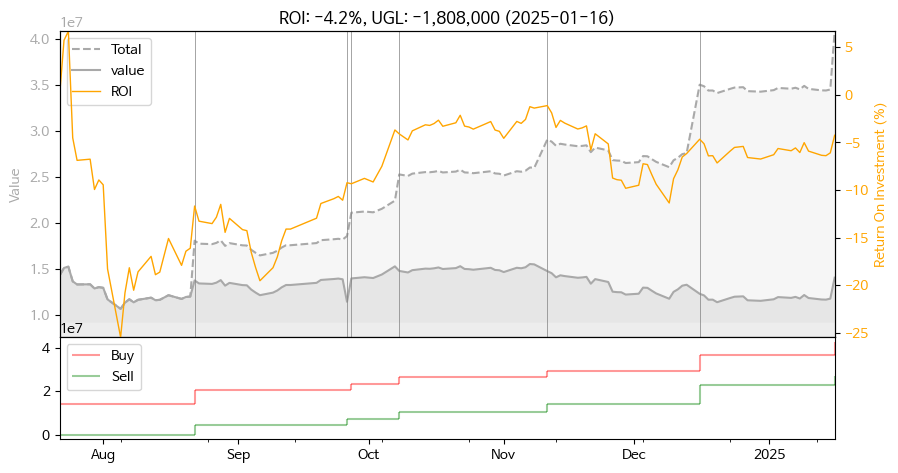

In [26]:
pf_mmt.plot(roi=True)

In [23]:
date = None
res = pf_mmt.valuate(date, print_msg=False)
#_ = [print(x, end=', ') for x in res]
res

Result from 2024-07-22 to 2025-01-16


buy      4.259505e+07
sell     2.677569e+07
value    1.401150e+07
ugl     -1.807860e+06
roi     -4.244297e-02
Name: 2025-01-16 00:00:00, dtype: float64

In [23]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [111]:
kwargs_trs = dict(
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2),
    nshares = True
)
kw_liq = dict(
    #assets_to_sell= {'489790':34500},
    #assets_to_sell= '489790',
    #hold= True
)
_ = pf_mmt.transaction_pipeline(**kwargs_trs, **kw_liq)

Liquidation set to None
5 tickers selected by Total return from 2024-01-09 to 2025-01-09
Weights of tickers determined by Equal weights.
New cash inflows of 3,000,000
Mean absolute error of weights: 6 %
ROI: -4.4%, UGL: -1,885,000  (2025-01-16)
All transactions saved to pf_k200_momentum_250116.csv


In [110]:
pf_mmt.view_record(-2, nshares=True)

name    price  transaction  net  weight  weight*  \
date       ticker                                                            
2024-12-16 267260     HD현대일렉트릭   389500           -1    7     0.2    0.222   
           010130         고려아연  1165000            2    2     0.2    0.190   
           003230         삼양식품   729000           -2    3     0.2    0.178   
           000150           두산   272500           10   10     0.2    0.222   
           298040        효성중공업   457999            5    5     0.2    0.187   
           012450    한화에어로스페이스   307499           -7    0     0.0    0.000   
           064350         현대로템    48250          -47    0     0.0    0.000   
           079550       LIG넥스원   193700          -11    0     0.0    0.000   
2025-01-16 267260     HD현대일렉트릭   417500            0    7     0.2    0.212   
           003230         삼양식품   770000            0    3     0.2    0.168   
           000150           두산   288000            0   10     0.2    0.209   
           012450    한화에어로스페이스   394000            6    7     0.2    0.200   
           010120  LS ELECTRIC   193400           15   15     0.2    0.211   
           010130         고려아연   817000           -2    0     0.0    0.000   
           298040        효성중공업   469000           -5    0     0.0    0.000   

                       date*  
date       ticker             
2024-12-16 267260 2024-12-17  
           010130 2024-12-17  
           003230 2024-12-17  
           000150 2024-12-17  
           298040 2024-12-17  
           012450 2024-12-17  
           064350 2024-12-17  
           079550 2024-12-17  
2025-01-16 267260 2025-01-16  
           003230 2025-01-16  
           000150 2025-01-16  
           012450 2025-01-16  
           010120 2025-01-16  
           010130 2025-01-16  
           298040 2025-01-16

## KRX
*simulation*

In [48]:
pf_krx = PM.create_portfolio('KRX', **kw_cost)

2712 securities from 2019-01-02 to 2024-10-08 uploaded.
Price data loaded
Cost data transaction_cost_241217.csv loaded
REMINDER: make sure this is 1st transaction as no records provided


In [20]:
pf_krx.view_record(-2)

No transaction record imported


In [21]:
pf_krx.valuate()

In [22]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [23]:
kwargs_trs = dict(
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2),
    nshares=True
)

_ = pf_krx.transaction_pipeline(**kwargs_trs)
pf_krx.view_record(-2)

Liquidation set to None
5 tickers selected by Total return from 2023-08-02 to 2024-08-02
Weights of tickers determined by Equal weights.
Mean absolute error of weights: 1 %
ROI: -3.7%, UGL: -364,000  (2024-10-08)
Set save=True to save transaction record


name  ratio  transaction      net  weight  weight*  \
date       ticker                                                         
2024-09-02 078860  엔에스이엔엠      1      1998150  1998150     0.2    0.201   
           016670     디모아      1      1996800  1996800     0.2    0.201   
           033790      피노      1      1996750  1996750     0.2    0.201   
           159910   스킨앤스킨      1      1999880  1999880     0.2    0.202   
           196170    알테오젠      1      1932000  1932000     0.2    0.195   

                       date*  
date       ticker             
2024-09-02 078860 2024-09-02  
           016670 2024-09-02  
           033790 2024-09-02  
           159910 2024-09-02  
           196170 2024-09-02

## PER

In [29]:
file = 'kospi200_ratios.csv'
df_ratio = FinancialRatios.util_get_ratio('PER', file, path_data)

Financial ratios of 200 stocks from 2023-01-02 to 2025-01-03 loaded


In [30]:
pf_per = PM.create_portfolio('PER_2410', df_additional=df_ratio, **kw_cost)

200 securities from 2022-01-03 to 2025-01-06 uploaded.
Price data loaded
Cost data transaction_cost_241217.csv loaded
Transaction record to 2024-11-11 loaded


In [31]:
#pf_per.portfolio_data

In [32]:
pf_per.view_record(-2)

name     ratio  transaction      net  weight  weight*  \
date       ticker                                                             
2024-10-17 010060   OCI홀딩스  0.992504       933800   933800    0.20    0.189   
           003030   세아제강지주  0.995439       986700   986700    0.20    0.200   
           009970  영원무역홀딩스  1.006742       979000   979000    0.20    0.198   
           016380     KG스틸  0.986364      1016400  1016400    0.20    0.206   
           047040     대우건설  1.000000      1019940  1019940    0.20    0.207   
2024-11-11 010060   OCI홀딩스  1.006689      -358800   478400    0.05    0.050   
           003030   세아제강지주  0.994309      -773200   386600    0.05    0.040   
           009970  영원무역홀딩스  0.997666      -514200   428500    0.05    0.045   
           016380     KG스틸  1.001517      -514020   500840    0.05    0.052   
           047040     대우건설  0.993122      -461645   508900    0.05    0.053   
           088350     한화생명  1.001745       515700   515700    0.05    0.054   
           078930       GS  1.002404       499200   499200    0.05    0.052   
           111770     영원무역  0.996264       481800   481800    0.05    0.050   
           139130  DGB금융지주  1.004848       519750   519750    0.05    0.054   
           005830   DB손해보험  1.016838       427600   427600    0.05    0.044   
           001450     현대해상  1.000000       505750   505750    0.05    0.053   
           009900     명신산업  1.008715       495720   495720    0.05    0.052   
           241560     두산밥캣  0.995000       520000   520000    0.05    0.054   
           000270       기아  1.010684       468000   468000    0.05    0.049   
           024110     기업은행  1.002059       509950   509950    0.05    0.053   
           005850      에스엘  1.014354       501600   501600    0.05    0.052   
           316140   우리금융지주  1.001244       514560   514560    0.05    0.054   
           138930  BNK금융지주  1.003181       518650   518650    0.05    0.054   
           005380      현대차  1.007160       419000   419000    0.05    0.044   
           017800   현대엘리베이  1.084233       416700   416700    0.05    0.043   

                       date*  
date       ticker             
2024-10-17 010060 2024-10-17  
           003030 2024-10-17  
           009970 2024-10-17  
           016380 2024-10-17  
           047040 2024-10-17  
2024-11-11 010060 2024-11-11  
           003030 2024-11-11  
           009970 2024-11-11  
           016380 2024-11-11  
           047040 2024-11-11  
           088350 2024-11-11  
           078930 2024-11-11  
           111770 2024-11-11  
           139130 2024-11-11  
           005830 2024-11-11  
           001450 2024-11-11  
           009900 2024-11-11  
           241560 2024-11-11  
           000270 2024-11-11  
           024110 2024-11-11  
           005850 2024-11-11  
           316140 2024-11-11  
           138930 2024-11-11  
           005380 2024-11-11  
           017800 2024-11-11

In [33]:
pf_per.valuate()

start    2024-10-17
date     2025-01-06
buy        12250265
sell        2617050
value       9576380
UGL          -56835
ROI       -0.004639
dtype: object

In [54]:
#pf_per.update_record()
#pf_per.view_record(-2)

Tickers 009900, 016380 added to universe


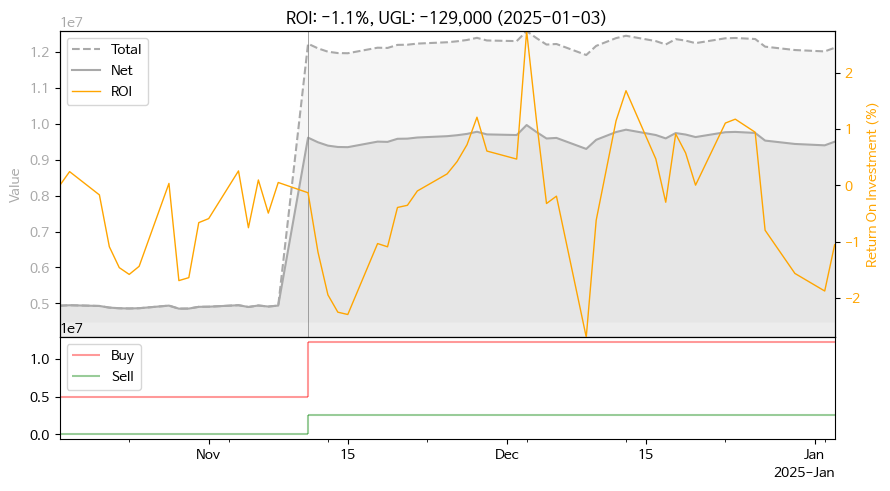

In [55]:
pf_per.plot()

In [56]:
_ = pf_per.check_additional(plot=True, figsize=(10,4), legend=False)

ERROR: KeyError "['016380', '009900'] not in index"


In [57]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [58]:
kwargs_trs = dict(
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2),
    nshares=True
)

_ = pf_per.transaction_pipeline(**kwargs_trs)
pf_per.view_record(-1)

Liquidation set to None
ERROR: no ratio for "['2024-12-16', '2024-12-17', '2024-12-18'] not in index"


name     ratio  transaction     net  weight  weight*  \
date       ticker                                                            
2024-11-11 010060   OCI홀딩스  1.006689      -358800  478400    0.05    0.050   
           003030   세아제강지주  0.994309      -773200  386600    0.05    0.040   
           009970  영원무역홀딩스  0.997666      -514200  428500    0.05    0.045   
           016380     KG스틸  1.001517      -514020  500840    0.05    0.052   
           047040     대우건설  0.993122      -461645  508900    0.05    0.053   
           088350     한화생명  1.001745       515700  515700    0.05    0.054   
           078930       GS  1.002404       499200  499200    0.05    0.052   
           111770     영원무역  0.996264       481800  481800    0.05    0.050   
           139130  DGB금융지주  1.004848       519750  519750    0.05    0.054   
           005830   DB손해보험  1.016838       427600  427600    0.05    0.044   
           001450     현대해상  1.000000       505750  505750    0.05    0.053   
           009900     명신산업  1.008715       495720  495720    0.05    0.052   
           241560     두산밥캣  0.995000       520000  520000    0.05    0.054   
           000270       기아  1.010684       468000  468000    0.05    0.049   
           024110     기업은행  1.002059       509950  509950    0.05    0.053   
           005850      에스엘  1.014354       501600  501600    0.05    0.052   
           316140   우리금융지주  1.001244       514560  514560    0.05    0.054   
           138930  BNK금융지주  1.003181       518650  518650    0.05    0.054   
           005380      현대차  1.007160       419000  419000    0.05    0.044   
           017800   현대엘리베이  1.084233       416700  416700    0.05    0.043   

                       date*  
date       ticker             
2024-11-11 010060 2024-11-11  
           003030 2024-11-11  
           009970 2024-11-11  
           016380 2024-11-11  
           047040 2024-11-11  
           088350 2024-11-11  
           078930 2024-11-11  
           111770 2024-11-11  
           139130 2024-11-11  
           005830 2024-11-11  
           001450 2024-11-11  
           009900 2024-11-11  
           241560 2024-11-11  
           000270 2024-11-11  
           024110 2024-11-11  
           005850 2024-11-11  
           316140 2024-11-11  
           138930 2024-11-11  
           005380 2024-11-11  
           017800 2024-11-11

In [42]:
#pf_per.update_record()

## WTR
*modified all weather*

In [40]:
#pf_wtr = PM.create_portfolio('WTR_2407', **kw_cost)
pf_wtr = PM.create_portfolio('WTR_2412', **kw_cost) # 배현정

6 securities from 2022-01-03 to 2025-01-06 uploaded.
Price data loaded
Cost data transaction_cost_241217.csv loaded
Transaction record to 2024-12-18 loaded


In [41]:
#pf_wtr.portfolio_data['strategy']
pf_wtr.update_record()

In [42]:
pf_wtr.view_record(-2, nshares=True)

name   price  transaction  net  weight  \
date       ticker                                                           
2024-12-18 069500             KODEX 200   32419           30   30  0.1667   
           379800      KODEX 미국S&P500TR   19475           50   50  0.1667   
           273130  KODEX 종합채권(AA-이상)액티브  116220            8    8  0.1667   
           411060            ACE KRX금현물   17120           57   57  0.1667   
           148070          KOSEF 국고채10년  114072            8    8  0.1667   
           284430        KODEX 200미국채혼합   12810           77   77  0.1667   

                   weight*      date*  
date       ticker                      
2024-12-18 069500    0.168 2024-12-19  
           379800    0.168 2024-12-19  
           273130    0.161 2024-12-19  
           411060    0.169 2024-12-19  
           148070    0.163 2024-12-19  
           284430    0.171 2024-12-19

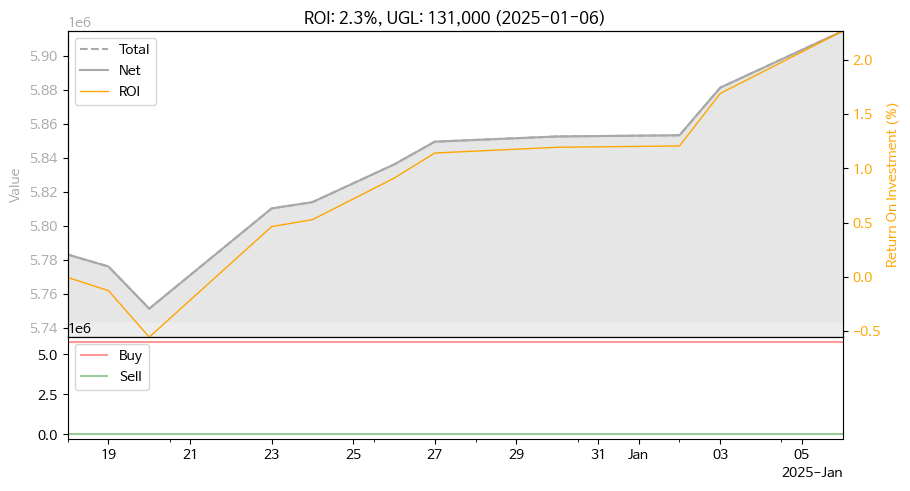

In [43]:
pf_wtr.plot()

In [46]:
date = None
res = pf_wtr.valuate(date, print_msg=False)
res.iloc[2:].to_list()
#res

[5783443, 0, 5914437, 130994, 0.022649829867779452]

In [22]:
#pf_wtr.performance(metrics=METRICS)

In [23]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [25]:
nshares = True
kwargs = dict(
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2),
    nshares=nshares
)
_ = pf_wtr.transaction_pipeline(**kwargs)
pf_wtr.view_record(-2, nshares=nshares)

Liquidation set to None
6 tickers selected by All from 2024-12-18 to 2024-12-18
Weights of tickers determined by Equal weights.
Mean absolute error of weights: 2 %
ROI: -0.0%, UGL: -246  (2024-12-18)
All transactions saved to pf_wtr2412_static_241218.csv


name   price  transaction  net  weight  \
date       ticker                                                           
2024-12-18 069500             KODEX 200   33080           30   30  0.1667   
           379800      KODEX 미국S&P500TR   19865           50   50  0.1667   
           273130  KODEX 종합채권(AA-이상)액티브  116830            8    8  0.1667   
           411060            ACE KRX금현물   17300           57   57  0.1667   
           148070          KOSEF 국고채10년  118955            8    8  0.1667   
           284430        KODEX 200미국채혼합   12850           77   77  0.1667   

                   weight*      date*  
date       ticker                      
2024-12-18 069500    0.170 2024-12-18  
           379800    0.170 2024-12-18  
           273130    0.160 2024-12-18  
           411060    0.169 2024-12-18  
           148070    0.163 2024-12-18  
           284430    0.169 2024-12-18

In [67]:
pf_wtr.valuate()

start    2024-12-18
date     2024-12-18
buy         5847726
sell              0
value       5847480
UGL            -246
ROI       -0.000042
dtype: object

## LIQ

In [25]:
pf_liq = PM.create_portfolio('LIQ', **kw_cost)

24 securities from 2022-01-03 to 2025-01-03 uploaded.
Price data loaded
Cost data transaction_cost_241217.csv loaded
Transaction record to 2024-01-03 loaded


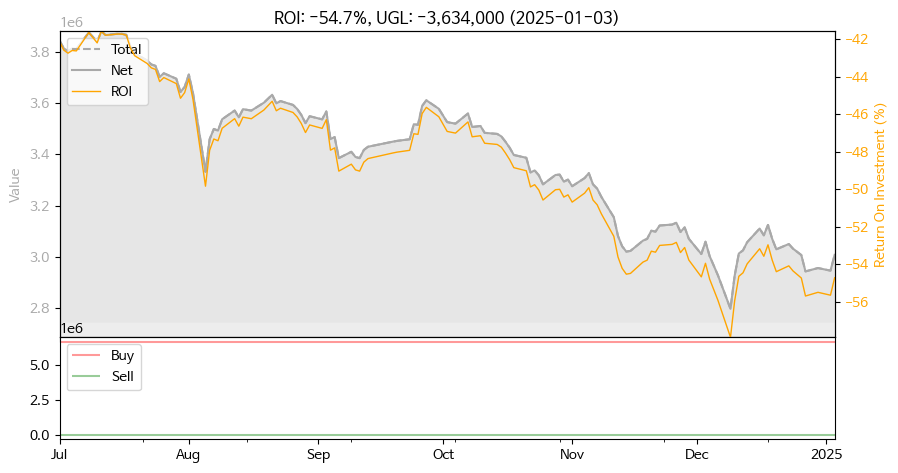

In [26]:
#date=None
date='2024-07-01'
pf_liq.plot(start_date=date)

In [28]:
pf_liq.valuate()

start    2024-01-03
date     2025-01-03
buy         6642319
sell              0
value       3008231
UGL        -3634088
ROI       -0.547111
dtype: object

In [27]:
pf_liq.view_record()

name     ratio  transaction     net  weight  weight*  \
date       ticker                                                            
2024-01-03 011780     금호석유  0.750877       342000  342000     NaN    0.051   
           066570     LG전자  0.812245       245000  245000     NaN    0.037   
           035890     서희건설  0.760000       298800  298800     NaN    0.045   
           040420  정상제이엘에스  0.875784       294890  294890     NaN    0.044   
           140520     대창스틸  0.803077       292500  292500     NaN    0.044   
           072990    에이치시티  0.542767       286200  286200     NaN    0.043   
           091580    상신이디피  0.918452       302400  302400     NaN    0.046   
           011200      HMM  0.755977       289850  289850     NaN    0.044   
           002220     한일철강  0.768371       297350  297350     NaN    0.045   
           006650     대한유화  0.832507       181500  181500     NaN    0.027   
           136490       선진  0.524409       292100  292100     NaN    0.044   
           064550    바이오니아  0.707956       297900  297900     NaN    0.045   
           460860     동국제강  0.599797       149784  149784     NaN    0.023   
           040910     아이씨디  0.741803       292800  292800     NaN    0.044   
           024950   삼천리자전거  0.675537       293100  293100     NaN    0.044   
           900070   글로벌에스엠  0.516667       299160  299160     NaN    0.045   
           036580      팜스코  0.523810       298410  298410     NaN    0.045   
           184230  SGA솔루션즈  0.589354       299820  299820     NaN    0.045   
           460850     동국씨엠  0.383273        90275   90275     NaN    0.014   
           016250  SGC E&C  0.409565       276000  276000     NaN    0.042   
           001230    동국홀딩스  0.354766        48088   48088     NaN    0.007   
           049470      SGA  0.528251       299935  299935     NaN    0.045   
           217820    원익피앤이  0.485701       275396  275396     NaN    0.041   
           109960   AP헬스케어  0.218206       598820  598820     NaN    0.090   

                       date*  
date       ticker             
2024-01-03 011780 2024-01-03  
           066570 2024-01-03  
           035890 2024-01-03  
           040420 2024-01-03  
           140520 2024-01-03  
           072990 2024-01-03  
           091580 2024-01-03  
           011200 2024-01-03  
           002220 2024-01-03  
           006650 2024-01-03  
           136490 2024-01-03  
           064550 2024-01-03  
           460860 2024-01-03  
           040910 2024-01-03  
           024950 2024-01-03  
           900070 2024-01-03  
           036580 2024-01-03  
           184230 2024-01-03  
           460850 2024-01-03  
           016250 2024-01-03  
           001230 2024-01-03  
           049470 2024-01-03  
           217820 2024-01-03  
           109960 2024-01-03

## TDF

In [27]:
selected = None

In [28]:
pf_tdf = PM.create_portfolio('TDF_2406', tickers=selected, cost=file_cost)
pf_tdf.view_record()

64 securities from 2008-11-28 to 2024-12-31 uploaded.
REMINDER: 64 equities converted to daily (days in year: 365)
Daily metrics in Performance statistics must be meaningless
Price data loaded
Cost data transaction_cost_241217.csv loaded
Transaction record to 2025-01-15 loaded


name  ratio  \
date       ticker                                                             
2024-06-19 K55301BU6139              미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e      1   
           K55206C95800    키움키워드림TDF2030증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금)      1   
2025-01-15 K55206C95800    키움키워드림TDF2030증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금)      1   
           K55301BU6139              미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e      1   
           K55364CF7048          에셋플러스슈퍼아시아리치투게더증권자투자신탁 1(주식)종류C-P2e      1   
           K55234BY9966                 IBK베트남플러스아시아증권투자신탁[주식]종류C-Re      1   
           K55213C50702  한화LIFEPLUSTDF2045증권투자신탁(혼합-재간접형)C-RPE(퇴직연금)      1   
           K55234DF3150        IBK로우코스트TDF2050증권자투자신탁[혼합-재간접형]종류C-Re      1   
           K55301BU6253             미래에셋전략배분TDF2040혼합자산자투자신탁 종류C-P2e      1   

                         transaction      net  weight  weight*      date*  
date       ticker                                                          
2024-06-19 K55301BU6139      5000000  5000000  0.5000    0.500 2024-06-19  
           K55206C95800      5000000  5000000  0.5000    0.500 2024-06-19  
2025-01-15 K55206C95800            0  5077506  0.1429    0.144 2025-01-15  
           K55301BU6139            0  5077009  0.1429    0.144 2025-01-15  
           K55364CF7048      5000000  5000000  0.1429    0.142 2025-01-15  
           K55234BY9966      5000000  5000000  0.1429    0.142 2025-01-15  
           K55213C50702      5000000  5000000  0.1429    0.142 2025-01-15  
           K55234DF3150      5000000  5000000  0.1429    0.142 2025-01-15  
           K55301BU6253      5000000  5000000  0.1429    0.142 2025-01-15

In [26]:
#pf_tdf.portfolio_data['strategy']
#pf_tdf.get_names()

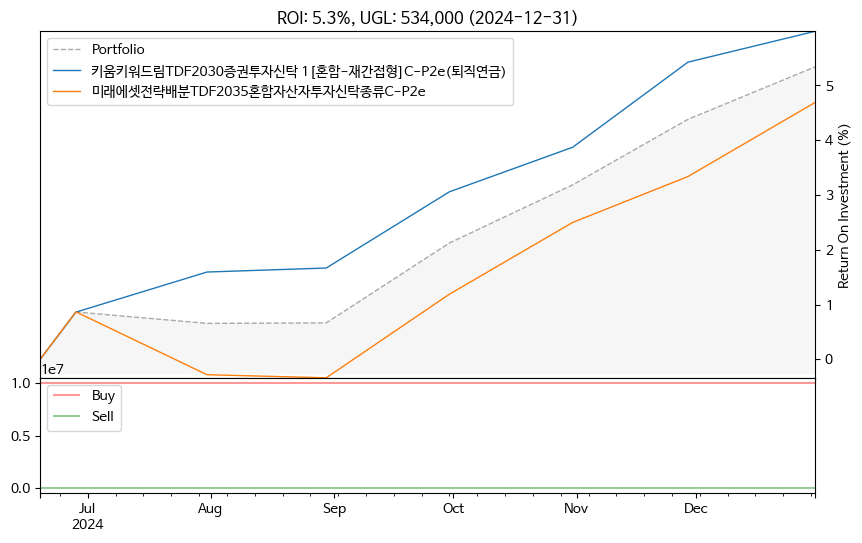

In [30]:
pf_tdf.plot(total=False)

In [31]:
date = None
res = pf_tdf.valuate(date, print_msg=False)
res

Result from 2024-06-19 to 2024-12-31


buy      1.000000e+07
sell     0.000000e+00
value    1.053394e+07
ugl      5.339420e+05
roi      5.339420e-02
Name: 2024-12-31 00:00:00, dtype: float64

In [32]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [16]:
kwargs = dict(
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2)
)
_ = pf_tdf.transaction_pipeline(**kwargs)

pf_tdf.view_record()

Liquidation set to None
7 tickers selected by Selected from 2024-12-31 to 2024-12-31
Weights of tickers determined by Equal weights.
New cash inflows of 25,000,000
Mean absolute error of weights: 0 %
ROI: 1.4%, UGL: 504,000  (2024-12-31)
All transactions saved to pf_tdf_static_241231.csv


name  ratio  \
date       ticker                                                             
2024-06-19 K55301BU6139              미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e      1   
           K55206C95800    키움키워드림TDF2030증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금)      1   
2024-12-31 K55206C95800    키움키워드림TDF2030증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금)      1   
           K55301BU6139              미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e      1   
           K55364CF7048          에셋플러스슈퍼아시아리치투게더증권자투자신탁 1(주식)종류C-P2e      1   
           K55234BY9966                 IBK베트남플러스아시아증권투자신탁[주식]종류C-Re      1   
           K55213C50702  한화LIFEPLUSTDF2045증권투자신탁(혼합-재간접형)C-RPE(퇴직연금)      1   
           K55234DF3150        IBK로우코스트TDF2050증권자투자신탁[혼합-재간접형]종류C-Re      1   
           K55301BU6253             미래에셋전략배분TDF2040혼합자산자투자신탁 종류C-P2e      1   

                         transaction      net  weight  weight*      date*  
date       ticker                                                          
2024-06-19 K55301BU6139      5000000  5000000  0.5000    0.500 2024-06-19  
           K55206C95800      5000000  5000000  0.5000    0.500 2024-06-19  
2024-12-31 K55206C95800      -221945  5077506  0.1429    0.143 2024-12-31  
           K55301BU6139      -157482  5077009  0.1429    0.143 2024-12-31  
           K55364CF7048      5077655  5077654  0.1429    0.143 2024-12-31  
           K55234BY9966      5077162  5077162  0.1429    0.143 2024-12-31  
           K55213C50702      5076831  5076831  0.1429    0.143 2024-12-31  
           K55234DF3150      5077180  5077180  0.1429    0.143 2024-12-31  
           K55301BU6253      5077278  5077278  0.1429    0.143 2024-12-31

## HANA

In [33]:
#selected = ['KR5101888398', 'KR5236AS4826', 'KR5370AP9956', 'K55306CV9946']
selected = None

In [35]:
pf_hana = PM.create_portfolio('HANA_2408', tickers=selected, **kw_cost)
pf_hana.view_record()

64 securities from 2008-11-28 to 2024-12-31 uploaded.
REMINDER: 64 equities converted to daily (days in year: 365)
Daily metrics in Performance statistics must be meaningless
Price data loaded
Cost data transaction_cost_241217.csv loaded
Transaction record to 2024-08-01 loaded


name  ratio  \
date       ticker                                                       
2024-08-01 KR5101888398        한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-e)      1   
           KR5236AS4826           한국밸류10년투자증권투자신탁 1(채권혼합)종류C-E      1   
           KR5370AP9956           AB글로벌고수익증권투자신탁(채권-재간접형)종류형Ce      1   
           K55306CV9946  다올글로벌멀티에셋인컴EMP증권자투자신탁[혼합-재간접형](공)종류Ce      1   

                         transaction      net  weight  weight*      date*  
date       ticker                                                          
2024-08-01 KR5101888398      5020000  5020000   0.502    0.503 2024-08-01  
           KR5236AS4826      2420000  2420000   0.242    0.242 2024-08-01  
           KR5370AP9956      1860000  1860000   0.186    0.186 2024-08-01  
           K55306CV9946       690000   690000   0.069    0.069 2024-08-01

In [49]:
#pf_hana.portfolio_data['strategy']
#pf_hana.cost
#pf_hana.get_names()

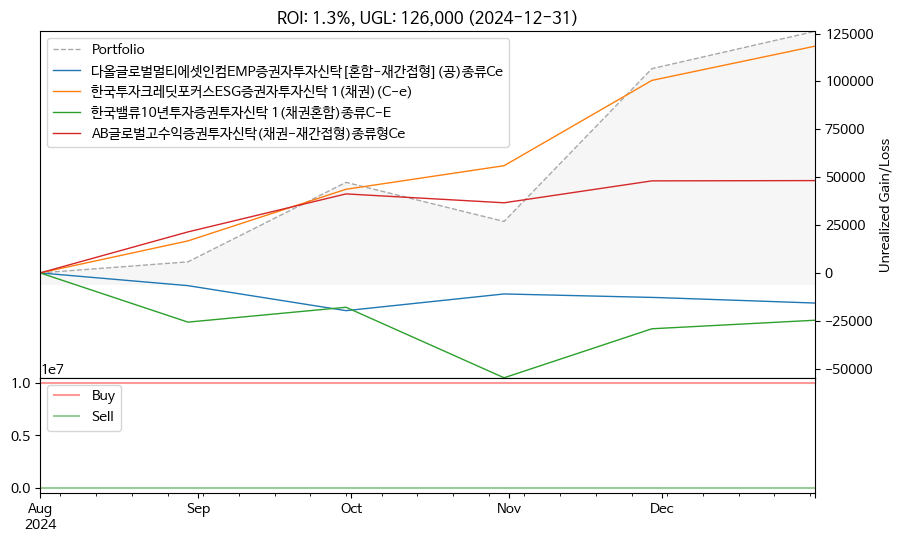

In [38]:
pf_hana.plot(total=False, roi=False)

In [51]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [52]:
kwargs = dict(
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2)
)
_ = pf_hana.transaction_pipeline(**kwargs)
pf_hana.view_record()

Liquidation set to None
4 tickers selected by Selected from 2022-11-29 to 2024-11-29
Weights of tickers determined by Inv.Vol.
New cash inflows of 5,000,000
Mean absolute error of weights: 0 %
ROI: 0.6%, UGL: 88,000  (2024-11-29)
Set save=True to save transaction record


name  ratio  \
date       ticker                                                       
2024-08-01 KR5101888398        한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-e)      1   
           KR5236AS4826           한국밸류10년투자증권투자신탁 1(채권혼합)종류C-E      1   
           KR5370AP9956           AB글로벌고수익증권투자신탁(채권-재간접형)종류형Ce      1   
           K55306CV9946  다올글로벌멀티에셋인컴EMP증권자투자신탁[혼합-재간접형](공)종류Ce      1   
2024-11-29 KR5101888398        한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-e)      1   
           KR5236AS4826           한국밸류10년투자증권투자신탁 1(채권혼합)종류C-E      1   
           KR5370AP9956           AB글로벌고수익증권투자신탁(채권-재간접형)종류형Ce      1   
           K55306CV9946  다올글로벌멀티에셋인컴EMP증권자투자신탁[혼합-재간접형](공)종류Ce      1   

                         transaction      net  weight  weight*      date*  
date       ticker                                                          
2024-08-01 KR5101888398      5020000  5020000  0.5020    0.503 2024-08-01  
           KR5236AS4826      2420000  2420000  0.2420    0.242 2024-08-01  
           KR5370AP9956      1860000  1860000  0.1860    0.186 2024-08-01  
           K55306CV9946       690000   690000  0.0690    0.069 2024-08-01  
2024-11-29 KR5101888398      3383285  8503829  0.5633    0.563 2024-11-29  
           KR5236AS4826       835773  3226604  0.2138    0.214 2024-11-29  
           KR5370AP9956       447243  2355309  0.1561    0.156 2024-11-29  
           K55306CV9946       330213  1007446  0.0668    0.067 2024-11-29

# testing

In [1]:
from pf_utils import PortfolioManager as PM 
from pf_utils import FinancialRatios, METRICS, FundDownloader
from pf_widgets import WidgetUniverse, WidgetTransaction, w_date

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
path_data = 'data'
path_tran = 'transaction'

In [3]:
file_cost='transaction_cost'
kw_cost = {'cost': file_cost}

In [4]:
#pf_mmt = PM.create_portfolio('MMT_2407', file='test', **kw_cost) 
pf_mmt = PM.create_portfolio('MMT_2407', **kw_cost) 

200 securities from 2022-01-03 to 2025-01-16 uploaded.
Price data loaded
Cost data transaction_cost_241217.csv loaded
Transaction record to 2025-01-16 loaded


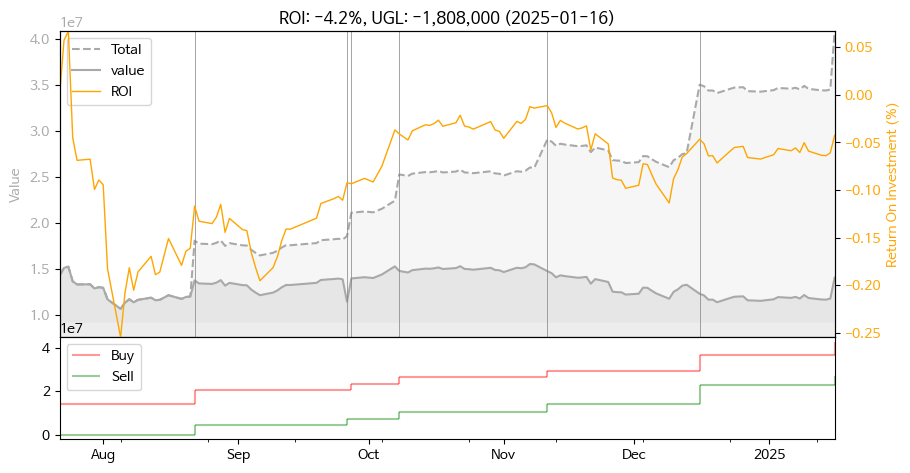

In [5]:
pf_mmt.plot(total=True)

In [117]:
def plot(self, start_date=None, end_date=None, total=True,
         figsize=(10,6), legend=True, height_ratios=(3,1), loc='upper left',
         roi=True, roi_log=False, cashflow=True, cost_excluded=False):
    """
    plot total, net and profit histories of portfolio
    """
    df_all = self.valuate(date='all', total=total, cost_excluded=cost_excluded)
    if df_all is None:
        return None
    else: # necessary to get tickers of end_date and plot vlines for trasaction dates
        df_rec = self._check_result(False)

    # reset start & end dates
    func = lambda x: x.loc[start_date:end_date]
    df_all = func(df_all)
    start_date, end_date = get_date_minmax(df_all, self.date_format)

    col_tkr = self.cols_record['tkr']
    col_date = self.cols_record['date']
    col_val = 'value'
    col_buy = 'buy'
    col_sell = 'sell'
    col_roi = 'roi'
    col_ugl = 'ugl'

    ax1, ax2 = self._plot_get_axes(figsize=figsize, height_ratios=height_ratios)
    # determine plot type: total or individuals
    col_pnl = col_roi if roi else col_ugl
    str_pnl = 'Return On Investment (%)' if roi else 'Unrealized Gain/Loss'
    mlf_pnl = 100 if roi else 1
    
    if total:
        # data for plot
        sr_ttl = df_all.apply(lambda x: x[col_sell] + x[col_val], axis=1)
        sr_val = df_all[col_val]
        sr_pnl = df_all[col_pnl].mul(mlf_pnl)

        # get title
        sr_end = df_all.loc[end_date]
        title = format_rounded_string(sr_end[col_roi], sr_end[col_ugl])
        title = f"{title} ({end_date})"

        # plot
        line_ttl = {'c':'darkgray', 'ls':'--'}
        _ = sr_ttl.plot(ax=ax1, label='Total', title=title, **line_ttl)
        _ = sr_val.plot(ax=ax1, c=line_ttl['c'])
        ax1.fill_between(sr_ttl.index, sr_ttl, ax1.get_ylim()[0], facecolor=line_ttl['c'], alpha=0.1)
        ax1.fill_between(sr_val.index, sr_val, ax1.get_ylim()[0], facecolor=line_ttl['c'], alpha=0.2)
        ax1.set_ylabel('Value')
        ax1.margins(0)
        
        # plot profit history
        ax1t = sr_pnl.plot(ax=ax1.twinx(), label=col_pnl.upper(), lw=1, color='orange')
        ax1t.set_ylabel(str_pnl)
        ax1t.margins(0)
        
        # set env for the twins
        _ = set_matplotlib_twins(ax1, ax1t, legend=legend, loc=loc)
    else:
        # data for plot
        # get tickers of the latest transaction
        dt = df_rec.loc[:end_date].index.get_level_values(col_date).max()
        tickers = df_rec.loc[dt].index
        idx = pd.IndexSlice
        df_tkr = df_all.loc[idx[:, tickers], :]

        #return df_tkr, col_pnl, col_tkr, mlf_pnl, col_date, col_ugl, col_buy, roi
        
        df_pnl = df_tkr[col_pnl].unstack(col_tkr).mul(mlf_pnl)
        if self.security_names is not None:
            df_pnl.columns = [self.security_names[x] for x in df_pnl.columns]
        sr_pnl_ttl = df_tkr.groupby(col_date).sum()
        sr_pnl_ttl = sr_pnl_ttl[col_ugl].div(sr_pnl_ttl[col_buy].div(mlf_pnl) if roi else 1).rename('Portfolio')

        # get title
        sr_end = df_all.loc[end_date]
        sr_end = sr_end.sum()
        sr_end[col_roi] = sr_end[col_ugl]/sr_end[col_buy]
        title = format_rounded_string(sr_end[col_roi], sr_end[col_ugl])
        title = f"{title} ({end_date})"

        # plot profit history
        line_ttl = {'c':'darkgray', 'ls':'--'}
        _ = sr_pnl_ttl.plot(ax=ax1, lw=1, title=title, **line_ttl)
        ax1.fill_between(sr_pnl_ttl.index, sr_pnl_ttl, ax1.get_ylim()[0], facecolor=line_ttl['c'], alpha=0.1)
        _ = df_pnl.plot(ax=ax1, lw=1)
        yl = ax1.set_ylabel(str_pnl)
        ax1.yaxis.tick_right()
        ax1.yaxis.set_label_position("right")
        #yl.set_rotation(-90)
        ax1.margins(0)
        ax1.set_xlabel('')
        ax1.legend(title=None)
        #cashflow = False

    # plot cashflow
    # you might use df_all to plot cashflow if transaction vlines not necessary 
    if cashflow:
        # plot vline for transaction dates
        dates_trs = func(df_rec).index.get_level_values(0).unique()
        ax1.vlines(dates_trs, 0, 1, transform=ax1.get_xaxis_transform(), lw=0.5, color='gray')
        # set slice for record with a single transaction
        ax2 = self.plot_cashflow(df_rec=df_rec, start_date=start_date, end_date=end_date, 
                                 cost_excluded=cost_excluded, ax=ax2)
    return None

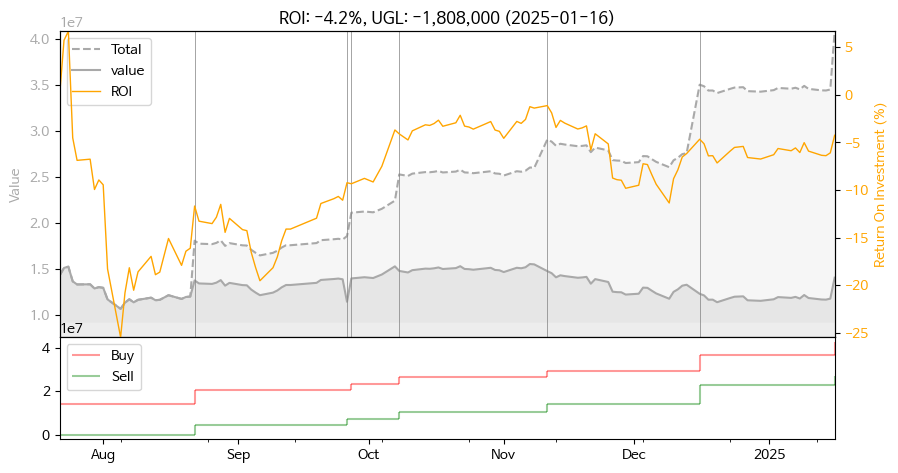

In [118]:
plot(pf_mmt, total=True, roi=True)
#plot(pf_tdf, total=True, roi=True)

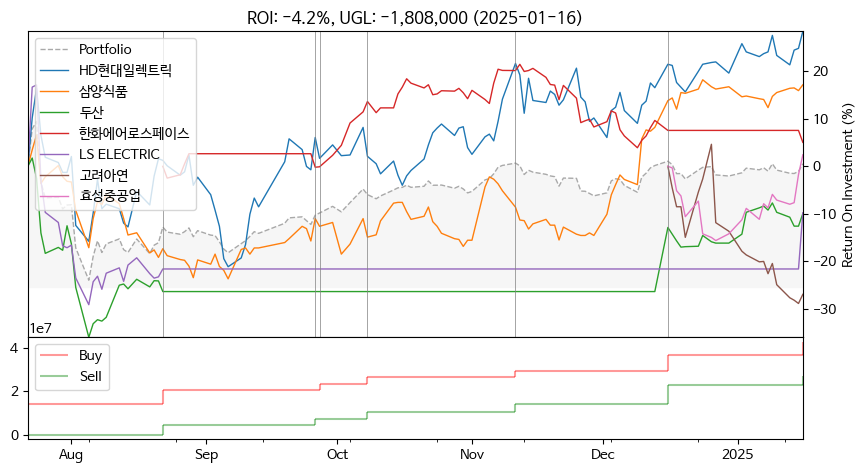

In [119]:
plot(pf_mmt, total=False, roi=True)
#plot(pf_tdf, total=False, roi=True)

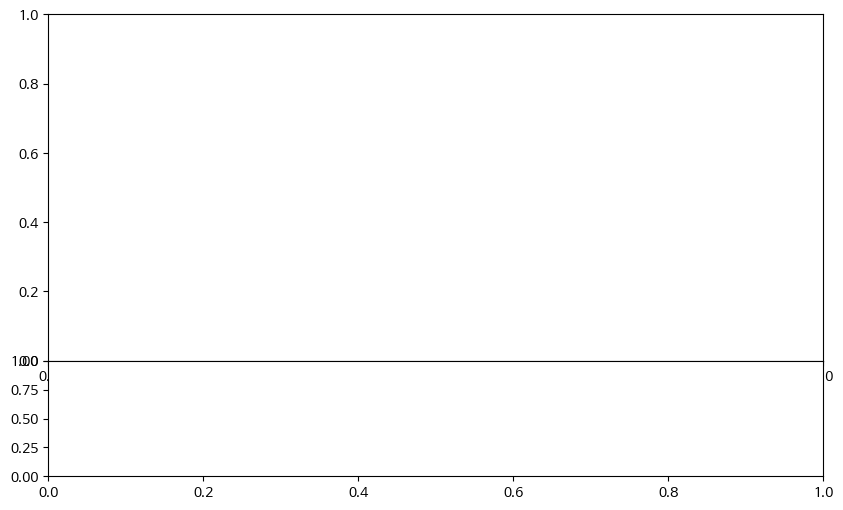

In [105]:
#plot(pf_mmt, total=False, roi=True)
#plot(pf_tdf, total=False, roi=True)
res=  plot(pf_tdf, total=False, roi=True)
df_tkr, col_pnl, col_tkr, mlf_pnl, col_date, col_ugl, col_buy, roi = res
        
sr_pnl = df_tkr[col_pnl].unstack(col_tkr).mul(mlf_pnl)
sr_pnl_ttl = df_tkr.groupby(col_date).sum()
sr_pnl_ttl = sr_pnl_ttl[col_ugl].div(sr_pnl_ttl[col_buy].div(mlf_pnl) if roi else 1).rename('Portfolio')


In [106]:
sr_pnl_ttl

date
2024-06-19    0.00000
2024-06-20    0.09606
2024-06-21    0.19213
2024-06-22    0.28820
2024-06-23    0.38427
               ...   
2024-12-27    5.21963
2024-12-28    5.24957
2024-12-29    5.27952
2024-12-30    5.30946
2024-12-31    5.33942
Name: Portfolio, Length: 196, dtype: float64

In [80]:
col_date = 'date'
col_buy = 'buy'
col_sell = 'sell'
col_roi = 'roi'
col_ugl = 'ugl'
df = df_all.groupby(col_date).sum()
df[col_ugl]/df[col_buy]

date
2024-06-19    0.000000
2024-06-20    0.000961
2024-06-21    0.001921
2024-06-22    0.002882
2024-06-23    0.003843
                ...   
2024-12-27    0.052196
2024-12-28    0.052496
2024-12-29    0.052795
2024-12-30    0.053095
2024-12-31    0.053394
Length: 196, dtype: float64

In [ ]:
from pf_utils import get_date_minmax, format_rounded_string, set_matplotlib_twins
from matplotlib import pyplot as plt
import pandas as pd

self = pf_mmt
sr_prf, res_prf, ax1 = plot(self, total=True, roi=True)
_ = sr_prf.plot(ax=ax1, label=res_prf.upper(), lw=1, color='orange')
#sr_prf.plot(ax=ax1.twinx(), label=res_prf.upper(), lw=1, color='orange')

In [101]:
_ = sr_prf.plot(ax=ax1, label=res_prf.upper(), lw=1, color='orange')

In [78]:
sr_prf, ax1t, res_prf = res

# plot profit history
_ = sr_prf.plot(ax=ax1t, label=res_prf.upper(), lw=1, color='orange')

TypeError: cannot unpack non-iterable NoneType object

In [ ]:
_ = self._plot_cashflow(df_cf, start_date=start_date, end_date=end_date, ax=ax2)

In [46]:
def plot(self, start_date=None, end_date=None, total=True,
         figsize=(10,6), legend=True, height_ratios=(3,1), loc='upper left',
         msg_cr=True, roi=True, roi_log=False, cost_excluded=False):
    """
    plot total(value+sell), net and profit histories of portfolio
    total: set to False to plot all of individual assets
    """
    df_rec = self._check_result(msg_cr)
    if df_rec is None:
        return None
    col_date = self.cols_record['date']
    col_val = 'value'
    col_buy = 'buy'
    col_sell = 'sell'
    col_roi = 'roi'
    col_ugl = 'ugl'

    df_res = self.valuate(date='all', total=total, cost_excluded=cost_excluded)
    func = lambda x: x.loc[start_date:end_date]
    df_res = func(df_res)

    # set data & title depending on total
    end_date = df_res.index.get_level_values(col_date).max().strftime(self.date_format)
    sr = df_res.loc[end_date]
    if total:
        title = format_rounded_string(sr[col_roi], sr[col_ugl])
        title = f"{title} ({end_date})"
    else:
        #tickers = sr.loc[sr[col_val]>0].index.to_list()
        tickers = sr.index.to_list() # take assets of end_date
        idx = pd.IndexSlice
        df_res = df_res.loc[idx[:, tickers],:]
        title = f'Performance of {len(tickers)} assets ({end_date})'

    sr_ttl = df_res.apply(lambda x: x[col_sell] + x[col_val], axis=1)
    sr_val = df_res[col_val]
    res_prf = col_roi if roi else col_ugl
    sr_prf = df_res[res_prf]

    #return df_res, sr_ttl, sr_val, sr_prf, figsize, height_ratios, title
    if not total:
        sr_ttl = sr_ttl.unstack(col_tkr)
        sr_val = sr_val.unstack(col_tkr)
        sr_prf = sr_prf.unstack(col_tkr)
    
    # plot historical of portfolio value
    ax1, ax2 = self._plot_get_axes(figsize=figsize, height_ratios=height_ratios)
    line_ttl = {'c':'darkgray', 'ls':'--'}
    _ = sr_ttl.plot(ax=ax1, label='Total', title=title, figsize=figsize, **line_ttl)
    _ = sr_val.plot(ax=ax1, c=line_ttl['c'])
    ax1.fill_between(sr_ttl.index, sr_ttl, ax1.get_ylim()[0], facecolor=line_ttl['c'], alpha=0.1)
    ax1.fill_between(sr_val.index, sr_val, ax1.get_ylim()[0], facecolor=line_ttl['c'], alpha=0.2)

    # plot vline for transaction dates
    dates_trs = func(df_rec).index.get_level_values(0).unique()
    ax1.vlines(dates_trs, 0, 1, transform=ax1.get_xaxis_transform(), lw=0.5, color='gray')
    ax1.set_ylabel('Value')
    
    # plot profit history
    ax1t = sr_prf.plot(ax=ax1.twinx(), label=res_prf.upper(), lw=1, color='orange')
    ax1t.set_ylabel('Return On Investment (%)' if roi else 'Unrealized Gain/Loss')
    # set env for the twins
    _ = set_matplotlib_twins(ax1, ax1t, legend=legend, loc=loc)
    ax1.margins(0)
    ax1t.margins(0)

    #_ = df_res[[col_buy, col_sell]].plot(ax=ax2)
    
    # plot cashflow
    if True:
        # set slice for record with a single transaction
        start, end = get_date_minmax(sr_val)
        ax2 = self.plot_cashflow(df_rec=df_rec, start_date=start, end_date=end, 
                                 cost_excluded=cost_excluded, ax=ax2)
    return None

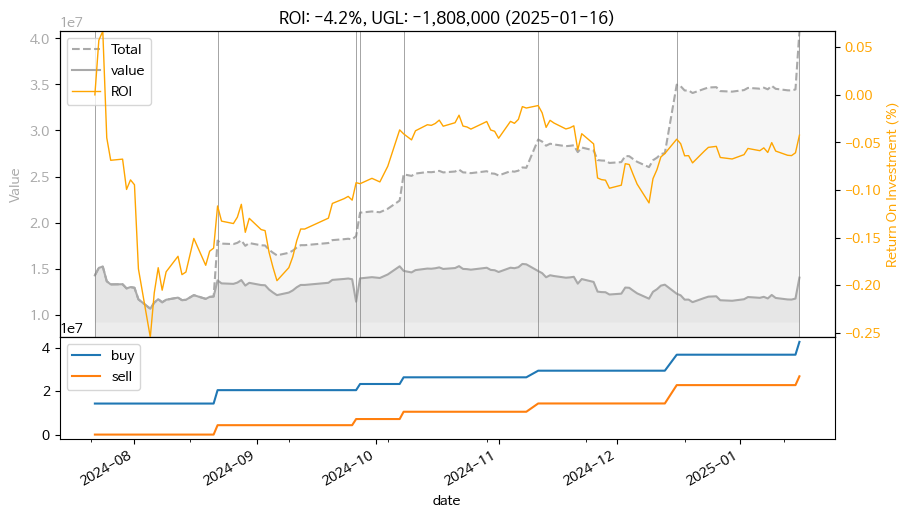

In [45]:
from pf_utils import set_matplotlib_twins, get_date_minmax
import pandas as pd

total= True
plot(pf_tdf, total=total)

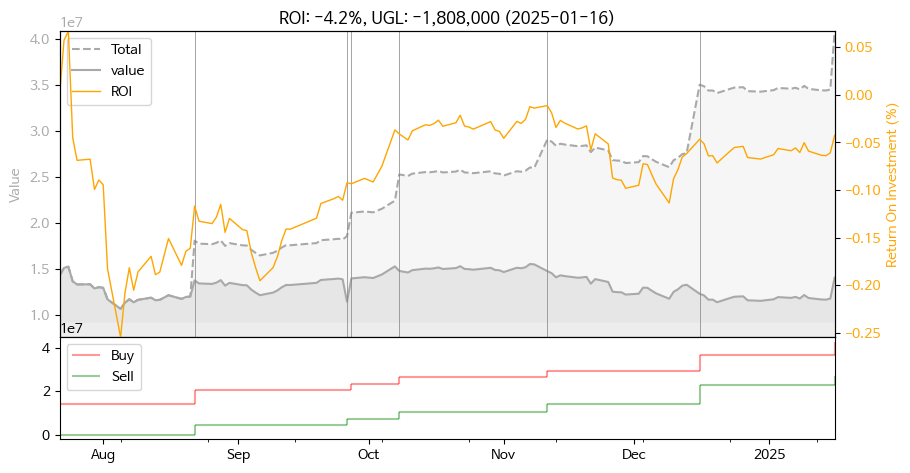

In [47]:
from pf_utils import set_matplotlib_twins, get_date_minmax
import pandas as pd

total= True
plot(pf_tdf, total=total)

In [32]:
pf_tdf = PM.create_portfolio('MMT_2407', **kw_cost) 

200 securities from 2022-01-03 to 2025-01-16 uploaded.
Price data loaded
Cost data transaction_cost_241217.csv loaded
Transaction record to 2025-01-16 loaded


In [15]:
pf_tdf = PM.create_portfolio('TDF_2406', **kw_cost)

64 securities from 2008-11-28 to 2024-12-31 uploaded.
REMINDER: 64 equities converted to daily (days in year: 365)
Daily metrics in Performance statistics must be meaningless
Price data loaded
Cost data transaction_cost_241217.csv loaded
Transaction record to 2025-01-15 loaded


In [33]:
from pf_utils import set_matplotlib_twins, get_date_minmax
import pandas as pd

#total= False
total= True
res = plot(pf_tdf, total=total)

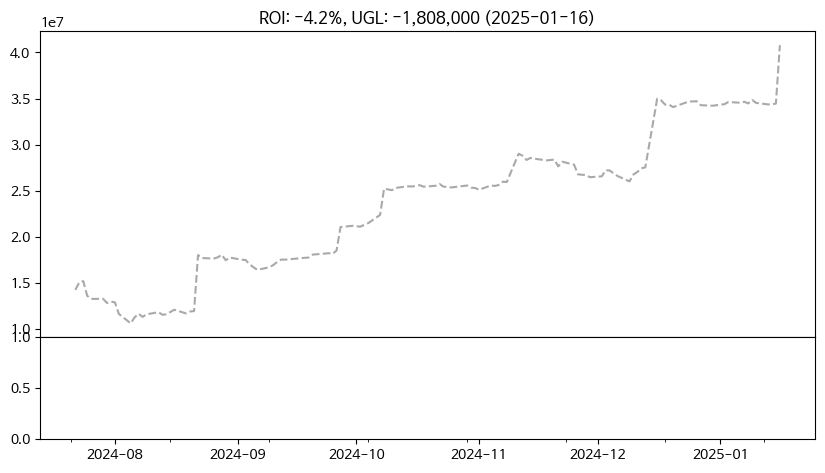

In [34]:
from pf_utils import format_rounded_string
self = pf_mmt

df_res, sr_ttl, sr_val, sr_prf, figsize, height_ratios, title = res

# plot historical of portfolio value
ax1, ax2 = self._plot_get_axes(figsize=figsize, height_ratios=height_ratios)
line_ttl = {'c':'darkgray', 'ls':'--'}
_ = sr_ttl.plot(ax=ax1, label='Total', title=title, figsize=figsize, **line_ttl)

In [35]:
#_ = sr_ttl.groupby(col_tkr).plot(x=col_date, legend=True)
sr_ttl.unstack().plot(legend=True)

ValueError: index must be a MultiIndex to unstack, <class 'pandas.core.indexes.datetimes.DatetimeIndex'> was passed

<Axes: xlabel='date,ticker'>

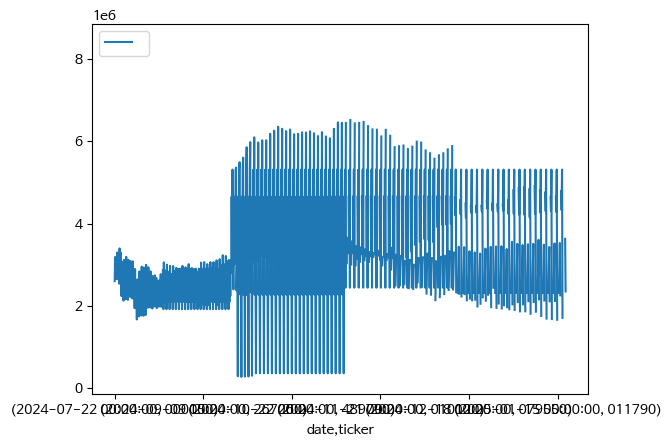

In [31]:
sr_ttl.plot(legend=True)

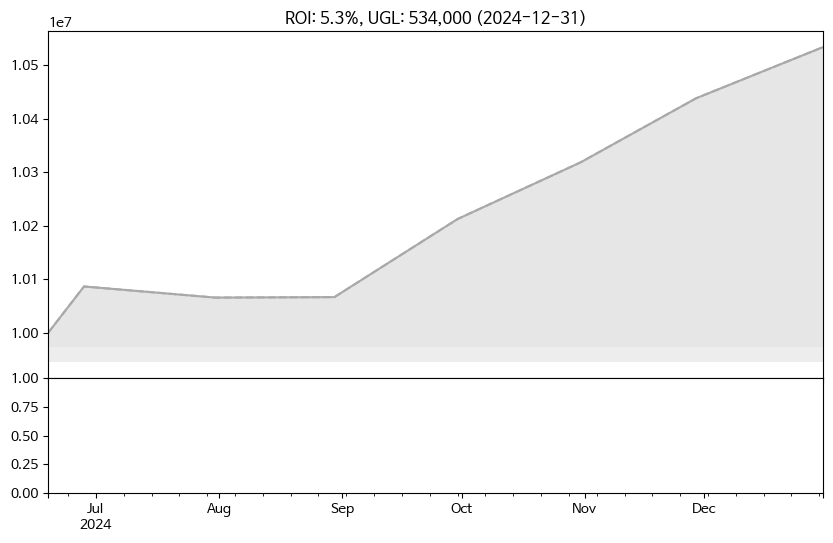

In [ ]:
_ = sr_val.plot(ax=ax1, c=line_ttl['c'])
ax1.fill_between(sr_ttl.index, sr_ttl, ax1.get_ylim()[0], facecolor=line_ttl['c'], alpha=0.1)
ax1.fill_between(sr_val.index, sr_val, ax1.get_ylim()[0], facecolor=line_ttl['c'], alpha=0.2)

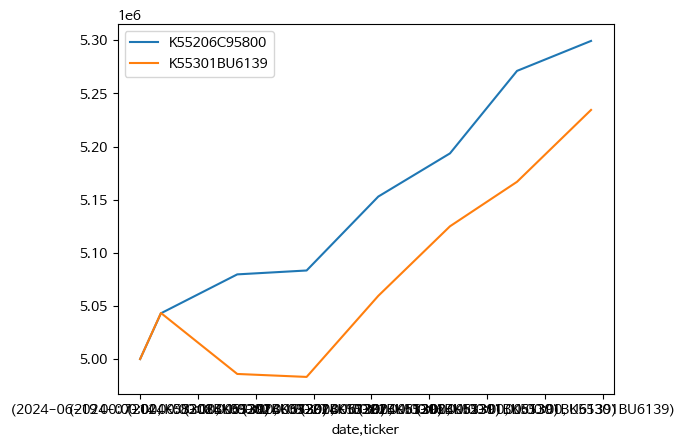

In [13]:
col_tkr = 'ticker'
col_date = 'date'
axes = sr_ttl.sort_index().groupby(col_tkr).plot(x=col_date, legend=True)


In [15]:
sr_ttl

date        ticker      
2024-06-19  K55206C95800    5000000.0
            K55301BU6139    5000000.0
2024-06-20  K55206C95800    5004787.0
            K55301BU6139    5004819.0
2024-06-21  K55206C95800    5009574.0
                              ...    
2024-12-29  K55301BU6139    5230264.0
2024-12-30  K55206C95800    5298569.0
            K55301BU6139    5232377.0
2024-12-31  K55206C95800    5299451.0
            K55301BU6139    5234491.0
Length: 392, dtype: float64

<Axes: xlabel='date'>

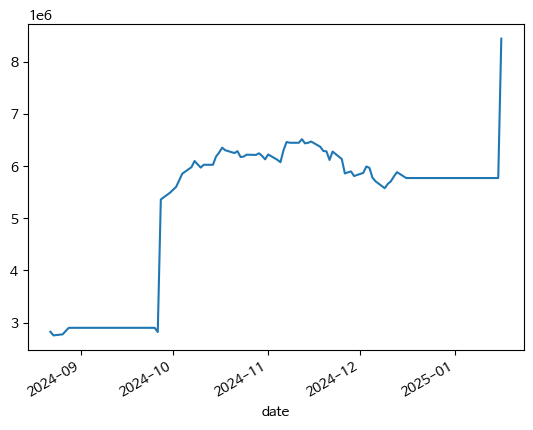

In [80]:
#axes[-1].get_xticklabels()
idx = pd.IndexSlice
sr_ttl.loc[idx[:, '012450']].plot()

## debug

In [4]:
pf_tdf = PM.create_portfolio('TDF_2406', **kw_cost)

64 securities from 2008-11-28 to 2024-12-31 uploaded.
REMINDER: 64 equities converted to daily (days in year: 365)
Daily metrics in Performance statistics must be meaningless
Price data loaded
Cost data transaction_cost_241217.csv loaded
Transaction record to 2025-01-15 loaded


In [5]:
pf_tdf.valuate(total=False)

Result from 2024-06-20 to 2024-12-31


,buy,sell,value,ugl,roi
ticker,,,,,
K55206C95800,NaN,NaN,5299451,299451.0,0.059890
K55301BU6139,NaN,NaN,5234491,234491.0,0.046898


In [6]:
def valuate(self, date=None, print_msg=False, cost_excluded=False, total=True):
    """
    calc date, buy/sell prices & portfolio value from self.record or self.df_rec
    date: date, None, 'all'
    """
    # get latest record
    df_rec = self._check_result(print_msg)
    if df_rec is None:
        return None

    if isinstance(date, str) and date.lower() == 'all':
        date = None
        history = True
    else:
        history = False

    date_format = self.date_format
    col_date = self.cols_record['date']
    
    # check date by price data
    df_prices = self._update_universe(df_rec, msg=print_msg)
    # update price data by adding tickers not in the universe if existing
    df_prices = self.liquidation.set_price(df_prices)
    date = df_prices.loc[:date].index.max() # works even if date None
    date_ft = df_rec.index.get_level_values(0).min()
    if date_ft > date:
        dt = date.strftime(date_format)
        return print(f'ERROR: No transaction before {dt}') if print_msg else None
    else:
        # convert dates to str for series as no more comparison
        date_ft, date = [x.strftime(date_format) for x in (date_ft, date)]
            
    # get record to date
    df_rec = df_rec.loc[:date]
    date_lt = df_rec.index.get_level_values(0).max()
    
    # calc value
    sr_val = self._calc_value_history(df_rec, date, self.name, msg=False, total=total)
    # buy & sell prices to date.
    cost = None if cost_excluded else self.cost

    #return df_rec, cost, total
    
    df_cf = self._calc_cashflow_history(df_rec, cost, total=total)

    # calc profit
    sr_ugl, sr_roi = [self._calc_profit(sr_val, df_cf, result=x, roi_percent=False) for x in ['UGL', 'ROI']]

    return sr_val, df_cf, sr_ugl, sr_roi
    
    if total:
        df_m = df_cf.join(sr_val.rename('value'), how='right').join(sr_ugl).ffill().join(sr_roi).ffill()
    else:
        df_m = self._join_cashflow_by_ticker(sr_val, df_cf, sr_ugl, sr_roi)
    df_m = df_m.dropna(how='all')

    if not history:
        start = df_m.index.get_level_values(col_date).min().strftime(date_format)
        print(f'Result from {start} to {date}')
        df_m = df_m.loc[date]
    return df_m

In [7]:
res = valuate(pf_tdf, total=False)
#df_rec, cost, total = res
sr_val, df_cf, sr_ugl, sr_roi = res

In [9]:
#self._calc_cashflow_history(df_rec, cost, total=total)
pf_tdf._join_cashflow_by_ticker(sr_val, df_cf, sr_ugl, sr_roi)

buy  sell    value       ugl       roi
date       ticker                                              
2024-06-20 K55206C95800  NaN   NaN  5004787    4787.0  0.000957
           K55301BU6139  NaN   NaN  5004819    4819.0  0.000964
2024-06-21 K55206C95800  NaN   NaN  5009574    9574.0  0.001915
           K55301BU6139  NaN   NaN  5009639    9639.0  0.001928
2024-06-22 K55206C95800  NaN   NaN  5014361   14361.0  0.002872
...                      ...   ...      ...       ...       ...
2024-12-29 K55301BU6139  NaN   NaN  5230264  230264.0  0.046053
2024-12-30 K55206C95800  NaN   NaN  5298569  298569.0  0.059714
           K55301BU6139  NaN   NaN  5232377  232377.0  0.046475
2024-12-31 K55206C95800  NaN   NaN  5299451  299451.0  0.059890
           K55301BU6139  NaN   NaN  5234491  234491.0  0.046898

[390 rows x 5 columns]

In [52]:
def _join_cashflow_by_ticker(self, sr_val, df_cf, sr_ugl, sr_roi):
    """
    Merge cashflow history (based on transaction records) with value history (based on price changes).
    sr_val, df_cf, sr_ugl: data by date & ticker
    """
    cols_record = self.cols_record
    col_date = cols_record['date']
    col_tkr = cols_record['tkr']
    col_val = 'value'
    
    index = None
    dates_cf = df_cf.index.get_level_values(col_date).unique()
    end = sr_val.index.get_level_values(col_date).max()
    for start in dates_cf.sort_values(ascending=False):
        dts = sr_val.loc[start:end].index.get_level_values(col_date).unique()
        if dts.size == 0: # end date is smaller tha start
            continue
        tkrs = df_cf.loc[start].index
        idx = pd.MultiIndex.from_product([dts, tkrs])
        index = idx if index is None else index.append(idx)
        end = start - pd.DateOffset(days=1)
   
    return (pd.DataFrame(index=index).join(df_cf).join(sr_val.rename(col_val))
            .join(sr_ugl).join(sr_roi).groupby(col_tkr).ffill().sort_index())

In [53]:
import pandas as pd

df = _join_cashflow_by_ticker(pf_tdf, sr_val, df_cf, sr_ugl, sr_roi)

In [54]:
df

buy  sell    value       ugl       roi
date       ticker                                                    
2024-06-19 K55206C95800  5000000.0   0.0  5000000       0.0  0.000000
           K55301BU6139  5000000.0   0.0  5000000       0.0  0.000000
2024-06-20 K55206C95800  5000000.0   0.0  5004787    4787.0  0.000957
           K55301BU6139  5000000.0   0.0  5004819    4819.0  0.000964
2024-06-21 K55206C95800  5000000.0   0.0  5009574    9574.0  0.001915
...                            ...   ...      ...       ...       ...
2024-12-29 K55301BU6139  5000000.0   0.0  5230264  230264.0  0.046053
2024-12-30 K55206C95800  5000000.0   0.0  5298569  298569.0  0.059714
           K55301BU6139  5000000.0   0.0  5232377  232377.0  0.046475
2024-12-31 K55206C95800  5000000.0   0.0  5299451  299451.0  0.059890
           K55301BU6139  5000000.0   0.0  5234491  234491.0  0.046898

[392 rows x 5 columns]

In [114]:
#def _join_cashflow_by_ticker(
self = pf_tdf
#sr_val, df_cf, sr_ugl, sr_roi):
"""
Merge cashflow history (based on transaction records) with value history (based on price changes).
sr_val, df_cf, sr_ugl: data by date & ticker
"""
cols_record = self.cols_record
col_date = cols_record['date']
col_tkr = cols_record['tkr']
col_val = 'value'

index = None
dates_cf = df_cf.index.get_level_values(col_date).unique()
dt_prv = dates_cf[0] # dt for no for-loop
tkrs = df_cf.loc[dt_prv].index # tkrs for no for-loop
for dt in dates_cf[1:]:
    tkrs = df_cf.loc[dt].index
    dts = sr_val.loc[dt_prv:dt].index.get_level_values(col_date).unique()
    idx = pd.MultiIndex.from_product([dts, tkrs])
    index = idx if index is None else index.append(idx)
    dt_prv = dt

index = pd.MultiIndex.from_product([[dt_prv], tkrs]) if index is None else index

In [115]:
index

MultiIndex([('2024-06-19', 'K55206C95800'),
            ('2024-06-19', 'K55301BU6139')],
           names=[None, 'ticker'])

In [111]:
# get dates after last cashflow
dts = sr_val.loc[dt_prv + pd.DateOffset(days=1):].index.get_level_values(col_date).unique()
if len(dts) > 0:
    idx = pd.MultiIndex.from_product([dts, tkrs])
    index = idx if index is None else index.append(idx)


In [113]:
index

MultiIndex([('2024-06-19', 'K55206C95800'),
            ('2024-06-19', 'K55301BU6139'),
            ('2024-06-20', 'K55206C95800'),
            ('2024-06-20', 'K55301BU6139'),
            ('2024-06-21', 'K55206C95800'),
            ('2024-06-21', 'K55301BU6139'),
            ('2024-06-22', 'K55206C95800'),
            ('2024-06-22', 'K55301BU6139'),
            ('2024-06-23', 'K55206C95800'),
            ('2024-06-23', 'K55301BU6139'),
            ...
            ('2024-12-27', 'K55206C95800'),
            ('2024-12-27', 'K55301BU6139'),
            ('2024-12-28', 'K55206C95800'),
            ('2024-12-28', 'K55301BU6139'),
            ('2024-12-29', 'K55206C95800'),
            ('2024-12-29', 'K55301BU6139'),
            ('2024-12-30', 'K55206C95800'),
            ('2024-12-30', 'K55301BU6139'),
            ('2024-12-31', 'K55206C95800'),
            ('2024-12-31', 'K55301BU6139')],
           names=[None, 'ticker'], length=392)

In [ ]:
(pd.DataFrame(index=index).join(df_cf).join(sr_val.rename(col_val))
        .join(sr_ugl).join(sr_roi).groupby(col_tkr).ffill())

# Backup

In [19]:
def valuate(self, date=None, print_msg=False, cost_excluded=False, total=True):
    """
    calc date, buy/sell prices & portfolio value from self.record or self.df_rec
    """
    # get latest record
    df_rec = self._check_result(print_msg)
    if df_rec is None:
        return None

    date_format = self.date_format
    col_date = self.cols_record['date']
    
    # check date by price data
    df_prices = self._update_universe(df_rec, msg=print_msg)
    # update price data by adding tickers not in the universe if existing
    df_prices = self.liquidation.set_price(df_prices)
    date = df_prices.loc[:date].index.max() # works even if date None
    date_ft = df_rec.index.get_level_values(0).min()
    if date_ft > date:
        dt = date.strftime(date_format)
        return print(f'ERROR: No transaction before {dt}') if print_msg else None
    else:
        # convert dates to str for series as no more comparison
        date_ft, date = [x.strftime(date_format) for x in (date_ft, date)]
            
    # get record to date
    df_rec = df_rec.loc[:date]
    date_lt = df_rec.index.get_level_values(0).max()
    
    # calc value
    sr_val = self._calc_value_history(df_rec, date, self.name, msg=False, total=total)
    # buy & sell prices to date.
    cost = None if cost_excluded else self.cost
    df_cf = self._calc_cashflow_history(df_rec, cost, total=total)

    # calc profit
    sr_ugl, sr_roi = [self._calc_profit(sr_val, df_cf, result=x, roi_percent=False) for x in ['UGL', 'ROI']]
    
    if total:
        df_m = df_cf.join(sr_val.rename('value'), how='right').join(sr_ugl).ffill().join(sr_roi).ffill()
    else:
        df_m = self._join_cashflow_by_ticker(sr_val, df_cf, sr_ugl, sr_roi)
    df_m = df_m.dropna(how='all')
    
    start = df_m.index.get_level_values(col_date).min().strftime(date_format)
    print(f'Result from {start} to {date}')
    return df_m.loc[date]

In [6]:
pf_mmt = PM.create_portfolio('MMT_2407') 

200 securities from 2022-01-03 to 2025-01-16 uploaded.
Price data loaded
Transaction record to 2025-01-16 loaded


In [7]:
pf_mmt.valuate()

start    2024-07-22
date     2025-01-16
buy        42593500
sell       26824951
value      14011500
UGL        -1757049
ROI       -0.041252
dtype: object

In [20]:
#total = False
total = True
self = pf_mmt
valuate(pf_mmt, total=total, cost_excluded=True)

Result from 2024-07-22 to 2025-01-16


buy      4.259350e+07
sell     2.682495e+07
value    1.401150e+07
ugl     -1.757049e+06
roi     -4.125158e-02
Name: 2025-01-16 00:00:00, dtype: float64

In [16]:
df.sum()

buy      4.259350e+07
sell     2.682495e+07
value    1.401150e+07
ugl     -1.757049e+06
roi     -3.236415e-01
dtype: float64

In [ ]:
total = False
res = valuate(pf_mmt, total=total, cost_excluded=True)
sr_val, df_cf, sr_ugl, sr_roi = res
df = self._join_cashflow_by_ticker(sr_val, df_cf, sr_ugl, sr_roi)
df.loc['2025-01-16']

In [96]:
import pandas as pd

#def _join_cashflow_by_ticker(
self = pf_mmt
#sr_val, df_cf, sr_ugl, sr_roi):
"""
Merge cashflow history (based on transaction records) with value history (based on price changes).
sr_val, df_cf, sr_ugl: data by date & ticker
"""
cols_record = self.cols_record
col_date = cols_record['date']
col_tkr = cols_record['tkr']
col_val = 'value'

index = None
dates_cf = df_cf.index.get_level_values(col_date).unique()
dt_prv = dates_cf[0] # dt for no for-loop
tkrs = df_cf.loc[dt_prv].index # tkrs for no for-loop
for dt in dates_cf[1:]:
    tkrs = df_cf.loc[dt].index
    dts = sr_val.loc[dt_prv:dt].index.get_level_values(col_date).unique()
    idx = pd.MultiIndex.from_product([dts, tkrs])
    index = idx if index is None else index.append(idx)
    dt_prv = dt
# get dates after last cashflow
dts = sr_val.loc[dt_prv + pd.DateOffset(days=1):].index.get_level_values(col_date).unique()
if len(dts) > 0:
    idx = pd.MultiIndex.from_product([dts, tkrs])
    index = idx if index is None else index.append(idx)

In [98]:
len(dts) > 0

False

In [95]:
pd.DateOffset(days=1)

<DateOffset: days=1>

In [10]:
selected = None
pf_tdf = PM.create_portfolio('TDF_2406', tickers=selected, cost=file_cost)

64 securities from 2008-11-28 to 2024-12-31 uploaded.
REMINDER: 64 equities converted to daily (days in year: 365)
Daily metrics in Performance statistics must be meaningless
Price data loaded
Cost data transaction_cost_241217.csv loaded
Transaction record to 2025-01-15 loaded


In [14]:
total = False
#total = True
valuate(pf_tdf, total=total, cost_excluded=True)

,buy,sell,value,ugl,roi
ticker,,,,,
K55206C95800,5000000.0,0.0,5299451,299451.0,0.059890
K55301BU6139,5000000.0,0.0,5234491,234491.0,0.046898


In [13]:
res = valuate(pf_tdf, total=total, cost_excluded=True)
sr_val, df_cf, sr_ugl, sr_roi = res

## done

In [9]:
def _calc_cashflow_history(df_rec, cols_record, total=True):
    """
    Returns df of cumulative buy and sell prices at each transaction.
    total: set to False to get histories of individual tickers
    """
    col_trs = cols_record['trs']
    col_tkr = cols_record['tkr']
    col_date = cols_record['date']
    col_cf = 'cf'

    sr_tr = df_rec.apply(lambda x: 'buy' if x[col_trs]>0 else 
                         ('sell' if x[col_trs]<0 else None), axis=1)
    df_cf = (df_rec.assign(**{col_cf: sr_tr}).dropna(subset=col_cf)
                   .pivot(columns=col_cf, values=col_trs).abs().sort_index())
    if total: 
        return df_cf.groupby(col_date).sum().cumsum() 
    else:
        return df_cf.unstack(col_tkr).cumsum().ffill().stack().fillna(0)

In [38]:
def calc_cashflow_history(self, date=None, percent=True,
                          cost=dict(buy=0.00363960, sell=0.00363960, tax=0.18, fee=0),
                          total=True):
    """
    calc net buy & sell prices at each transaction date
    cost: dict of cost items
    total: set to False to get histories of individual tickers
    """
    df_rec = self.df_rec
    if df_rec is None:
        return None
    else:
        cols_record = self.cols_record
        col_date = cols_record['date']
        col_tkr = cols_record['tkr']

    # force to total to calc df_net
    df_cf = CostManager._calc_cashflow_history(df_rec, cols_record, total=False)
    df_cf = df_cf.loc[:date]
    if cost is None: # cashflow without cost
        return df_cf.groupby(col_date).sum() if total else df_cf

    # calc cost
    df_cost = self.calc_cost(date=date, percent=percent, **cost)
    df_cost = df_cost.rename(columns={'buy':'cost_buy'})
    df_cost['cost_sell'] = df_cost['sell'] + df_cost['fee'] + df_cost['tax']
    df_cost = df_cost[['cost_buy', 'cost_sell']]
    df_cost = df_cost.unstack(col_tkr).cumsum().ffill().stack()
    
    # calc net cashflow
    df_net = df_cf.join(df_cost, how='outer')
    df_net['buy']  = df_net['buy'] + df_net['cost_buy']
    df_net['sell']  = df_net['sell'] - df_net['cost_sell']
    df_net = df_net[['buy', 'sell']]

    if total: 
        df_net = df_net.groupby(col_date).sum()

    return df_net

In [13]:
def _calc_value_history(self, df_rec, end_date=None, name=None, msg=False, total=True):
    """
    calc historical of portfolio value from transaction
    end_date: calc value from 1st transaction of df_rec to end_date.
    name: name of output series
    """
    cols_record = self.cols_record
    col_date = cols_record['date']
    col_rat = cols_record['rat']
    col_net = cols_record['net']
    end = datetime.today() if end_date is None else end_date
    sr_ttl = None
    dates_trs = df_rec.index.get_level_values(0).unique()
    # update price data with df_rec
    df_universe = self._update_universe(df_rec, msg=msg)
    df_universe = self.liquidation.set_price(df_universe)
    df_universe = df_universe.rename_axis(col_date)
    # get number of shares
    sr_nshares = self._get_nshares(df_rec, df_universe, cols_record, int_nshares=False)
    sr_nshares = sr_nshares[col_net]
    df_unit = df_universe.copy()
    df_unit.loc[:,:] = None
    
    # loop for transaction dates in descending order
    for start in dates_trs.sort_values(ascending=False):
        n_tickers = sr_nshares.loc[start]
        df_c = df_universe.loc[start:end, n_tickers.index]
        if len(df_c) == 0: # no price data from transaction date start
            continue
            
        # get ratio of closed to buy/sell price on transaction date 'start'
        rat_i = df_unit.loc[start:end, n_tickers.index]
        rat_i.loc[start] = df_rec.loc[start, col_rat]
        # calc combined security value history from prv transaction (start) to current (end) 
        sr_i = (df_c.div(rat_i, fill_value=1) # trading price
                    .apply(lambda x: x*n_tickers.loc[x.name])) # x.name: index name
        # concat histories        
        sr_ttl = sr_i if sr_ttl is None else pd.concat([sr_ttl, sr_i])
        end = start - pd.DateOffset(days=1)
    
    if sr_ttl is None:
        return print('ERROR: no historical')
    else:
        sr_ttl = sr_ttl.sort_index()
    
    if total:
        sr_ttl = sr_ttl.fillna(0).sum(axis=1).astype(int)
    else:
        sr_ttl = sr_ttl.stack().dropna().astype(int)
    
    return sr_ttl if name is None else sr_ttl.rename(name)

In [42]:
#total = True
total = False
df_rec = pf_mmt.view_record(value=True)
cols_record = pf_mmt.cols_record
_calc_cashflow_history(df_rec, cols_record, total=total)

cf                       buy       sell
date       ticker                      
2024-07-22 000150  2600000.0        0.0
           003230  3185000.0        0.0
           010120  2664000.0        0.0
           042700  2980000.0        0.0
           267260  2826000.0        0.0
2024-08-22 000150  2600000.0  1918800.0
           003230  3694000.0        0.0
           010120  2664000.0  2092800.0
           012450  2825000.0        0.0
           042700  3103100.0        0.0
           079550  2702000.0        0.0
           267260  2826000.0   318000.0
2024-09-26 000150  2600000.0  1918800.0
           003230  3694000.0        0.0
           010120  2664000.0  2092800.0
           012450  2825000.0  2825000.0
           042700  3103100.0        0.0
           079550  2702000.0        0.0
           267260  2826000.0   318000.0
2024-09-27 000150  2600000.0  1918800.0
           003230  3694000.0        0.0
           010120  2664000.0  2092800.0
           012450  5368292.0  2825000.0
           042700  3103100.0        0.0
           079550  2702000.0        0.0
           267260  2826000.0   318000.0
           489790   281709.0        0.0
2024-10-08 000150  2600000.0  1918800.0
           003230  3694000.0        0.0
           010120  2664000.0  2092800.0
           011790  3072000.0        0.0
           012450  5368292.0  2825000.0
           042700  3103100.0  2270100.0
           079550  2702000.0   730500.0
           267260  2826000.0   318000.0
           489790   281709.0   354150.0
2024-11-11 000150  2600000.0  1918800.0
           003230  3694000.0   563000.0
           010120  2664000.0  2092800.0
           011790  3072000.0  2442900.0
           012450  5368292.0  3632000.0
           042700  3103100.0  2270100.0
           064350  3038400.0        0.0
           079550  2702000.0   730500.0
           267260  2826000.0   318000.0
           489790   281709.0   354150.0
2024-12-16 000150  5325000.0  1918800.0
           003230  3694000.0  2021000.0
           010120  2664000.0  2092800.0
           010130  2330000.0        0.0
           011790  3072000.0  2442900.0
           012450  5368292.0  5784501.0
           042700  3103100.0  2270100.0
           064350  3038400.0  2316000.0
           079550  2702000.0  2861200.0
           267260  2826000.0   707500.0
           298040  2290000.0        0.0
           489790   281709.0   354150.0

In [43]:
from pf_utils import CostManager

df_rec = pf_mmt.view_record(value=True)
cols_record = pf_mmt.cols_record
cost = pf_mmt.cost

cm = CostManager(df_rec, pf_mmt.cols_record, pf_mmt.date_format)
calc_cashflow_history(cm, total=total, cost=cost)

buy          sell
date       ticker                            
2024-07-22 000150  2.600095e+06  0.000000e+00
           003230  3.185116e+06  0.000000e+00
           010120  2.664097e+06  0.000000e+00
           042700  2.980108e+06  0.000000e+00
           267260  2.826103e+06  0.000000e+00
2024-08-22 000150  2.600095e+06  1.915276e+06
           003230  3.694134e+06  0.000000e+00
           010120  2.664097e+06  2.088957e+06
           012450  2.825103e+06  0.000000e+00
           042700  3.103213e+06  0.000000e+00
           079550  2.702098e+06  0.000000e+00
           267260  2.826103e+06  3.174160e+05
2024-09-26 000150  2.600095e+06  1.915276e+06
           003230  3.694134e+06  0.000000e+00
           010120  2.664097e+06  2.088957e+06
           012450  2.825103e+06  2.819812e+06
           042700  3.103213e+06  0.000000e+00
           079550  2.702098e+06  0.000000e+00
           267260  2.826103e+06  3.174160e+05
2024-09-27 000150  2.600095e+06  1.915276e+06
           003230  3.694134e+06  0.000000e+00
           010120  2.664097e+06  2.088957e+06
           012450  5.368487e+06  2.819812e+06
           042700  3.103213e+06  0.000000e+00
           079550  2.702098e+06  0.000000e+00
           267260  2.826103e+06  3.174160e+05
           489790  2.817193e+05  0.000000e+00
2024-10-08 000150  2.600095e+06  1.915276e+06
           003230  3.694134e+06  0.000000e+00
           010120  2.664097e+06  2.088957e+06
           011790  3.072112e+06  0.000000e+00
           012450  5.368487e+06  2.819812e+06
           042700  3.103213e+06  2.265931e+06
           079550  2.702098e+06  7.291585e+05
           267260  2.826103e+06  3.174160e+05
           489790  2.817193e+05  3.534996e+05
2024-11-11 000150  2.600095e+06  1.915276e+06
           003230  3.694134e+06  5.619661e+05
           010120  2.664097e+06  2.088957e+06
           011790  3.072112e+06  2.438414e+06
           012450  5.368487e+06  3.625330e+06
           042700  3.103213e+06  2.265931e+06
           064350  3.038511e+06  0.000000e+00
           079550  2.702098e+06  7.291585e+05
           267260  2.826103e+06  3.174160e+05
           489790  2.817193e+05  3.534996e+05
2024-12-16 000150  5.325194e+06  1.915276e+06
           003230  3.694134e+06  2.017289e+06
           010120  2.664097e+06  2.088957e+06
           010130  2.330085e+06  0.000000e+00
           011790  3.072112e+06  2.438414e+06
           012450  5.368487e+06  5.773878e+06
           042700  3.103213e+06  2.265931e+06
           064350  3.038511e+06  2.311747e+06
           079550  2.702098e+06  2.855946e+06
           267260  2.826103e+06  7.062007e+05
           298040  2.290083e+06  0.000000e+00
           489790  2.817193e+05  3.534996e+05

In [41]:
df_rec = pf_mmt.record
#df_rec = pf_mmt.view_record(value=True)
pf_mmt._calc_cashflow_history(df_rec, cost)

,buy,sell
date,,
2024-07-22,1.425552e+07,0.000000e+00
2024-08-22,2.041484e+07,4.321649e+06
2024-09-26,2.041484e+07,7.141461e+06
2024-09-27,2.323995e+07,7.141461e+06
2024-10-08,2.631206e+07,1.049005e+07
2024-11-11,2.935057e+07,1.429595e+07
2024-12-16,3.669584e+07,2.272714e+07


{'buy': 0.0036396, 'sell': 0.0036396, 'fee': 0.0, 'tax': 0.18}

In [15]:
pf_mmt.record

name     ratio  transaction      net  weight  \
date       ticker                                                         
2024-07-22 003230          삼양식품  0.995290      3185000  3185000   0.227   
           267260      HD현대일렉트릭  0.936306      2826000  2826000   0.198   
           042700         한미반도체  0.975839      2980000  2980000   0.205   
           000150            두산  0.972500      2600000  2600000   0.189   
           010120   LS ELECTRIC  0.986486      2664000  2664000   0.181   
2024-08-22 267260      HD현대일렉트릭  0.988994      -318000  2544000   0.192   
           003230          삼양식품  0.996071       509000  3054000   0.217   
           012450     한화에어로스페이스  0.984071      2825000  2825000   0.206   
           079550        LIG넥스원  0.982902      2702000  2702000   0.199   
           042700         한미반도체  0.980504       123100  2585100   0.186   
           000150            두산  0.998645     -1918800        0   0.000   
           010120   LS ELECTRIC  0.980505     -2092800        0   0.000   
2024-09-26 267260      HD현대일렉트릭  1.000000            0  2680000     NaN   
           003230          삼양식품  1.000000            0  3288000     NaN   
           012450     한화에어로스페이스  1.026549     -2825000        0     NaN   
           079550        LIG넥스원  1.000000            0  3024000     NaN   
           042700         한미반도체  1.000000            0  2398200     NaN   
2024-09-27 267260      HD현대일렉트릭  1.000000            0  2556000     NaN   
           003230          삼양식품  1.000000            0  3228000     NaN   
           079550        LIG넥스원  1.000000            0  2947000     NaN   
           042700         한미반도체  1.000000            0  2373000     NaN   
           012450     한화에어로스페이스  1.121774      2543292  2543292     NaN   
           489790  한화인더스트리얼솔루션즈  1.000000       281709   281709     NaN   
2024-10-08 267260      HD현대일렉트릭  1.000000            0  2568000   0.182   
           012450     한화에어로스페이스  1.000000            0  3280500   0.210   
           079550        LIG넥스원  1.004107      -730500  2678500   0.192   
           003230          삼양식품  1.000000            0  3144000   0.216   
           011790           SKC  1.001302      3072000  3072000   0.200   
           042700         한미반도체  0.993525     -2270100        0     NaN   
           489790  한화인더스트리얼솔루션즈  1.035578      -354150        0     NaN   
2024-11-11 267260      HD현대일렉트릭  1.000000            0  3120000   0.200   
           012450     한화에어로스페이스  1.030979      -807000  2824500   0.200   
           079550        LIG넥스원  1.000000            0  2926000   0.200   
           003230          삼양식품  0.998224      -563000  2815000   0.200   
           064350          현대로템  1.012638      3038400  3038400   0.200   
           011790           SKC  0.995538     -2442900        0     NaN   
2024-12-16 267260      HD현대일렉트릭  0.975610      -389500  2726500   0.200   
           010130          고려아연  1.000858      2330000  2330000   0.200   
           003230          삼양식품  1.000000     -1458000  2187000   0.200   
           000150            두산  0.963303      2725000  2725000   0.200   
           298040         효성중공업  0.985808      2290000  2290000   0.200   
           012450     한화에어로스페이스  1.040650     -2152501        0   0.000   
           064350          현대로템  1.026943     -2316000        0   0.000   
           079550        LIG넥스원  1.004130     -2130700        0   0.000   

                       date*  price  
date       ticker                    
2024-07-22 003230 2024-07-22    NaN  
           267260 2024-07-22    NaN  
           042700 2024-07-22    NaN  
           000150 2024-07-22    NaN  
           010120 2024-07-22    NaN  
2024-08-22 267260 2024-08-22    NaN  
           003230 2024-08-22    NaN  
           012450 2024-08-22    NaN  
           079550 2024-08-22    NaN  
           042700 2024-08-22    NaN  
           000150 2024-08-22    NaN  
           010120 2024-08-22    NaN  
2024-09-26 267260 2024-09-26    NaN  
      

## TODO

In [184]:
df_rec = pf_mmt.view_record(value=True)
cols_record = pf_mmt.cols_record

cm = CostManager(df_rec, pf_mmt.cols_record, pf_mmt.date_format)
df_net = calc_cashflow_history(cm, total=True)

In [186]:
df_net.groupby('date').sum()

,buy,sell
date,,
2024-07-22,1.425552e+07,0.000000e+00
2024-08-22,2.041484e+07,4.321649e+06
2024-09-26,2.041484e+07,7.141461e+06
2024-09-27,2.323995e+07,7.141461e+06
2024-10-08,2.631206e+07,1.049005e+07
2024-11-11,2.935057e+07,1.429595e+07
2024-12-16,3.669584e+07,2.272714e+07


In [175]:
date = None
percent = True
cost=dict(buy=0.00363960, sell=0.00363960, tax=0.18, fee=0)
self = cm

df_cf = calc_cashflow_history(cm)
df_cost = self.calc_cost(date=date, percent=percent, **cost)

df_cost = df_cost.rename(columns={'buy':'cost_buy'})
df_cost['cost_sell'] = df_cost['sell'] + df_cost['fee'] + df_cost['tax']
df_cost = df_cost[['cost_buy', 'cost_sell']]
df_cost = df_cost.unstack(col_tkr).cumsum().ffill().stack()

In [ ]:
df_net = df_cf.join(df_cost, how='outer').ffill()
df_net['buy']  = df_net['buy'] + df_net['cost_buy']
df_net['sell']  = df_net['sell'] - df_net['cost_sell']

In [177]:
df_net = df_cf.join(df_cost, how='outer')
df_net['buy']  = df_net['buy'] + df_net['cost_buy']
df_net['sell']  = df_net['sell'] - df_net['cost_sell']
df_net

buy          sell    cost_buy     cost_sell
date       ticker                                                      
2024-07-22 000150  2.600095e+06  0.000000e+00   94.629600      0.000000
           003230  3.185116e+06  0.000000e+00  115.921260      0.000000
           010120  2.664097e+06  0.000000e+00   96.958944      0.000000
           042700  2.980108e+06  0.000000e+00  108.460080      0.000000
           267260  2.826103e+06  0.000000e+00  102.855096      0.000000
2024-08-22 000150  2.600095e+06  1.915276e+06   94.629600   3523.676645
           003230  3.694134e+06  0.000000e+00  134.446824      0.000000
           010120  2.664097e+06  2.088957e+06   96.958944   3843.209549
           012450  2.825103e+06  0.000000e+00  102.818700      0.000000
           042700  3.103213e+06  0.000000e+00  112.940428      0.000000
           079550  2.702098e+06  0.000000e+00   98.341992      0.000000
           267260  2.826103e+06  3.174160e+05  102.855096    583.973928
2024-09-26 000150  2.600095e+06  1.915276e+06   94.629600   3523.676645
           003230  3.694134e+06  0.000000e+00  134.446824      0.000000
           010120  2.664097e+06  2.088957e+06   96.958944   3843.209549
           012450  2.825103e+06  2.819812e+06  102.818700   5187.818700
           042700  3.103213e+06  0.000000e+00  112.940428      0.000000
           079550  2.702098e+06  0.000000e+00   98.341992      0.000000
           267260  2.826103e+06  3.174160e+05  102.855096    583.973928
2024-09-27 000150  2.600095e+06  1.915276e+06   94.629600   3523.676645
           003230  3.694134e+06  0.000000e+00  134.446824      0.000000
           010120  2.664097e+06  2.088957e+06   96.958944   3843.209549
           012450  5.368487e+06  2.819812e+06  195.384356   5187.818700
           042700  3.103213e+06  0.000000e+00  112.940428      0.000000
           079550  2.702098e+06  0.000000e+00   98.341992      0.000000
           267260  2.826103e+06  3.174160e+05  102.855096    583.973928
           489790  2.817193e+05  0.000000e+00   10.253081      0.000000
2024-10-08 000150  2.600095e+06  1.915276e+06   94.629600   3523.676645
           003230  3.694134e+06  0.000000e+00  134.446824      0.000000
           010120  2.664097e+06  2.088957e+06   96.958944   3843.209549
           011790  3.072112e+06  0.000000e+00  111.808512      0.000000
           012450  5.368487e+06  2.819812e+06  195.384356   5187.818700
           042700  3.103213e+06  2.265931e+06  112.940428   4168.802560
           079550  2.702098e+06  7.291585e+05   98.341992   1341.487278
           267260  2.826103e+06  3.174160e+05  102.855096    583.973928
           489790  2.817193e+05  3.534996e+05   10.253081    650.359643
2024-11-11 000150  2.600095e+06  1.915276e+06   94.629600   3523.676645
           003230  3.694134e+06  5.619661e+05  134.446824   1033.890948
           010120  2.664097e+06  2.088957e+06   96.958944   3843.209549
           011790  3.072112e+06  2.438414e+06  111.808512   4486.131788
           012450  5.368487e+06  3.625330e+06  195.384356   6669.790272
           042700  3.103213e+06  2.265931e+06  112.940428   4168.802560
           064350  3.038511e+06  0.000000e+00  110.585606      0.000000
           079550  2.702098e+06  7.291585e+05   98.341992   1341.487278
           267260  2.826103e+06  3.174160e+05  102.855096    583.973928
           489790  2.817193e+05  3.534996e+05   10.253081    650.359643
2024-12-16 000150  5.325194e+06  1.915276e+06  193.808700   3523.676645
           003230  3.694134e+06  2.017289e+06  134.446824   3711.356316
           010120  2.664097e+06  2.088957e+06   96.958944   3843.209549
           010130  2.330085e+06  0.000000e+00   84.802680      0.000000
           011790  3.072112e+06  2.438414e+06  111.808512   4486.131788
           012450  5.368487e+06  5.773878e+06  195.384356  10622.634498
           042700  3.103213e+06  2.265931e+06  112.940428   4168.802560
           064350  3.038511e+06  2.311747e+06  110.585606   4253.093